# March Machine Learning Madness 2024
### Predicting NCAA Basketball Tournament Results
##### From the [Kaggle Competition: "March Machine Learning Mania 2024"](https://www.kaggle.com/competitions/march-machine-learning-mania-2024/overview)
##### By David Hartsman

<div class="alert alert-block alert-info" style="font-size: 1em; background-color:blue; color:white";>
<b>Data Preparation Notebook</b> 
</div>

### Overview:
This notebook will load in all of the data provided by Kaggle. I will outline the contents of each file and aggregate the data into a large merged dataset. That final dataset will be used to generate predictions about future NCAA tournament games for both the Men's and Women's brackets. Ideally, some additional outside sources will also be incorporated to supplement the dataset. The end goal is to make the most informed possible predictions about the roughly **`9.2 QUINTILLION DISTINCT OUTCOMES`** possible in these 64 games. 

<hr style="border: 4px solid blue">

In [3]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import warnings

warnings.filterwarnings("ignore")

### Exploration of the Various Data Files
There are 32 separate data sources that require exploration and understanding. I will begin my project by inspecting the contents of these files to understand the information contained within. Kaggle outlines 5 distinct sections that these files are categorized into. Also, I will add a new feature on load-in to classify which league, Men or Women, the data refers to. 

In [4]:
# Using the os library and this path to make pd.read_csv() statements more concise 
path = '/Users/samalainabayeva/Desktop/FLAT_IRON!!!/NCAA_KAGGLE/march-machine-learning-mania-2024'

<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Data Section 1:</b> The Basics
</div>

 1. **M/W Teams**
 2. **M/W Seasons**
 3. **M/W Tournament Seeds**
 4. **M/W `RegularSeason` CompactResults**
 5. **M/W `NCAATourney` CompactResults**


<hr style="border: 2px solid blue">

##### 1.) M/W Teams
- TeamID -> Unique Identifier
- TeamName -> String Name
- FirstD1Season -> Year of said-season
- LastD1Season -> 2024 if currently D1, else final year as D1 school

In [79]:
# Load -> I will be adding a new feature for each dataset to label the League: Men/Women
men_teams = pd.read_csv(os.path.join(path, 'MTeams.csv')).assign(League="Men")
women_teams = pd.read_csv(os.path.join(path, 'WTeams.csv')).assign(League="Women")

# Inspect
print(men_teams.shape) 
print(men_teams.head()) 

# Women's has same info without season information, shouldn't be too significant
women_teams.head()

(378, 5)
   TeamID     TeamName  FirstD1Season  LastD1Season League
0    1101  Abilene Chr           2014          2024    Men
1    1102    Air Force           1985          2024    Men
2    1103        Akron           1985          2024    Men
3    1104      Alabama           1985          2024    Men
4    1105  Alabama A&M           2000          2024    Men


,TeamID,TeamName,League
0,3101,Abilene Chr,Women
1,3102,Air Force,Women
2,3103,Akron,Women
3,3104,Alabama,Women
4,3105,Alabama A&M,Women


In [6]:
# Very few schools have cycled out of D1 eligibility 
men_teams["LastD1Season"].value_counts(normalize=False)

LastD1Season
2024    362
1991      2
1987      2
2023      2
2006      1
1992      1
2011      1
1990      1
2003      1
1998      1
1985      1
2019      1
2010      1
1986      1
Name: count, dtype: int64

In [80]:
# Combined data
all_teams = pd.concat([men_teams, women_teams])
all_teams

,TeamID,TeamName,FirstD1Season,LastD1Season,League
0,1101,Abilene Chr,2014.0,2024.0,Men
1,1102,Air Force,1985.0,2024.0,Men
2,1103,Akron,1985.0,2024.0,Men
3,1104,Alabama,1985.0,2024.0,Men
4,1105,Alabama A&M,2000.0,2024.0,Men
...,...,...,...,...,...
371,3474,Queens NC,NaN,NaN,Women
372,3475,Southern Indiana,NaN,NaN,Women
373,3476,Stonehill,NaN,NaN,Women
374,3477,TX A&M Commerce,NaN,NaN,Women


<hr style="border: 2px solid blue">

##### 2.) Seasons
- Season -> int, year
- DayZero -> First day of given season
- RegionW -> name of each specific region, in the future, data will be organized by 'WXYZ' regions, not "Midwest", etc.
- RegionX -> same
- RegionY -> same
- RegionZ -> same

In [8]:
# Load - parsing dates as DayZero is a specific datetime, might be needed later
mens_seasons = pd.read_csv(os.path.join(path, "MSeasons.csv"), parse_dates=["DayZero"]).assign(League="Men")
womens_seasons = pd.read_csv(os.path.join(path, "WSeasons.csv"), parse_dates=["DayZero"]).assign(League="Women")
# Inspect
print(mens_seasons.shape, mens_seasons.head())

# All same data, just not reaching as far back
womens_seasons.head()

(40, 7)    Season    DayZero RegionW    RegionX    RegionY    RegionZ League
0    1985 1984-10-29    East       West    Midwest  Southeast    Men
1    1986 1985-10-28    East    Midwest  Southeast       West    Men
2    1987 1986-10-27    East  Southeast    Midwest       West    Men
3    1988 1987-11-02    East    Midwest  Southeast       West    Men
4    1989 1988-10-31    East       West    Midwest  Southeast    Men


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ,League
0,1998,1997-10-27,East,Midwest,Mideast,West,Women
1,1999,1998-10-26,East,Mideast,Midwest,West,Women
2,2000,1999-11-01,East,Midwest,Mideast,West,Women
3,2001,2000-10-30,East,Midwest,Mideast,West,Women
4,2002,2001-10-29,East,West,Mideast,Midwest,Women


In [9]:
# Combined data
seasons = pd.concat([mens_seasons, womens_seasons])
seasons

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ,League
0,1985,1984-10-29,East,West,Midwest,Southeast,Men
1,1986,1985-10-28,East,Midwest,Southeast,West,Men
2,1987,1986-10-27,East,Southeast,Midwest,West,Men
3,1988,1987-11-02,East,Midwest,Southeast,West,Men
4,1989,1988-10-31,East,West,Midwest,Southeast,Men
...,...,...,...,...,...,...,...
22,2020,2019-11-04,NA1,NA2,NA3,NA4,Women
23,2021,2020-11-02,Alamo,Hemisfair,Mercado,RiverWalk,Women
24,2022,2021-11-01,Bridgeport,Spokane,Greensboro,Wichita,Women
25,2023,2022-10-31,Greenville1,Seattle4,Greenville2,Seattle3,Women


<hr style="border: 2px solid blue">

##### 3.) Seeds:
This data contain 128 rows, 64 for each tournament, **MEN'S and WOMEN'S** respectively. The 
- Tournament -> column designates M/W for men or women, 
- Seed -> contains bracket region and numeric seeds, and 
- TeamID -> contains what may be a unique identifier for merging

In [10]:
# Load
mens_seeds = pd.read_csv(os.path.join(path, 'MNCAATourneySeeds.csv')).assign(League="Men")
womens_seeds = pd.read_csv(os.path.join(path, 'WNCAATourneySeeds.csv')).assign(League="Women")

#Inspect
print(mens_seeds.shape)
print(mens_seeds.head())
womens_seeds.head()

(2490, 4)
   Season Seed  TeamID League
0    1985  W01    1207    Men
1    1985  W02    1210    Men
2    1985  W03    1228    Men
3    1985  W04    1260    Men
4    1985  W05    1374    Men


,Season,Seed,TeamID,League
0,1998,W01,3330,Women
1,1998,W02,3163,Women
2,1998,W03,3112,Women
3,1998,W04,3301,Women
4,1998,W05,3272,Women


In [11]:
# Combined Data
all_seeds = pd.concat([mens_seeds, womens_seeds])
all_seeds

,Season,Seed,TeamID,League
0,1985,W01,1207,Men
1,1985,W02,1210,Men
2,1985,W03,1228,Men
3,1985,W04,1260,Men
4,1985,W05,1374,Men
...,...,...,...,...
1603,2023,Z12,3405,Women
1604,2023,Z13,3387,Women
1605,2023,Z14,3241,Women
1606,2023,Z15,3436,Women


<hr style="border: 4px solid red"\>

<div class="alert alert-block alert-info" style="font-size: 2em; background-color: red; color: white;">
<b>NEEDS TO BE UPDATED:</b> TOURNAMENT SEEDS
</div>

This file will be updated after the official 2024 seeds are announced on Selection Sunday. This file is being used here just for explantory purposes. The updated file will be referenced in the [third notebook.](https://github.com/dvdhartsman/March_Machine_Learning_Mania_2024/blob/main/3_Bracket_Generation.ipynb) 

<hr style="border: 4px solid red"\>

In [12]:
# Load data
tournament_seeds = pd.read_csv(os.path.join(path, '2024_tourney_seeds.csv'))

# Inspect the DF contents
print(tournament_seeds.shape) 
tournament_seeds.head()

(128, 3)


,Tournament,Seed,TeamID
0,M,W01,1345
1,M,W02,1266
2,M,W03,1243
3,M,W04,1397
4,M,W05,1181


<hr style="border: 2px solid blue">

##### 4.) Regular Season Compact Results
- Season -> int, year
- DayNum -> 0 - 132 (Selection Sunday)
- WTeamID -> unique key
- WScore -> int, winning score
- LTeamID -> unique key
- LScore -> int, losing score
- WLoc -> location (Home/Away/Neutral]) of the winning team
- NumOT -> int, number of overtime periods in the game

In [13]:
# Load
mens_reg_seas_compact = pd.read_csv(os.path.join(path, 'MRegularSeasonCompactResults.csv')).assign(League="Men")
womens_reg_seas_compact = pd.read_csv(os.path.join(path, 'WRegularSeasonCompactResults.csv')).assign(League="Women")

# Inspect
print(mens_reg_seas_compact.shape) 
print(mens_reg_seas_compact.head())
# Same data for women as men
womens_reg_seas_compact.head()

(186552, 9)
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT League
0    1985      20     1228      81     1328      64    N      0    Men
1    1985      25     1106      77     1354      70    H      0    Men
2    1985      25     1112      63     1223      56    H      0    Men
3    1985      25     1165      70     1432      54    H      0    Men
4    1985      25     1192      86     1447      74    H      0    Men


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,League
0,1998,18,3104,91,3202,41,H,0,Women
1,1998,18,3163,87,3221,76,H,0,Women
2,1998,18,3222,66,3261,59,H,0,Women
3,1998,18,3307,69,3365,62,H,0,Women
4,1998,18,3349,115,3411,35,H,0,Women


In [14]:
# Combined Data
reg_seas_compact = pd.concat([mens_reg_seas_compact, womens_reg_seas_compact])
reg_seas_compact

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,League
0,1985,20,1228,81,1328,64,N,0,Men
1,1985,25,1106,77,1354,70,H,0,Men
2,1985,25,1112,63,1223,56,H,0,Men
3,1985,25,1165,70,1432,54,H,0,Men
4,1985,25,1192,86,1447,74,H,0,Men
...,...,...,...,...,...,...,...,...,...
130890,2024,114,3409,76,3396,67,A,0,Women
130891,2024,114,3424,63,3129,57,H,0,Women
130892,2024,114,3433,69,3348,59,A,0,Women
130893,2024,114,3453,70,3236,61,A,0,Women


<hr style="border: 2px solid blue">

##### 5.)  **`NCAA Tourney`** Compact Results
Many familiar features that will be used for joining
- Season -> Year, int
- DayNum -> because these are tourney games, they are all `GREATER THAN` 132
- WTeamID
- WScore -> score content
- LTeamID
- LScore -> losing score
- WLoc -> Winner's Respective Location 'H' for Home, 'A' for Away, 'N' for neutral, ALMOST ALL NEUTRAL FOR TOURNEY
- NumOT - number of overtime periods in the game, might want to create features based off of this column


In [15]:
# Load
men_ncaa_compact_results = pd.read_csv(os.path.join(path, 'MNCAATourneyCompactResults.csv')).assign(League="Men")
women_ncaa_compact_results = pd.read_csv(os.path.join(path, 'WNCAATourneyCompactResults.csv')).assign(League="Women")
# Inspect
print(men_ncaa_compact_results.shape) 
print(men_ncaa_compact_results.head())

# Same but home and away "WLoc"s are much different based on tournament format
women_ncaa_compact_results.head()

(2451, 9)
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT League
0    1985     136     1116      63     1234      54    N      0    Men
1    1985     136     1120      59     1345      58    N      0    Men
2    1985     136     1207      68     1250      43    N      0    Men
3    1985     136     1229      58     1425      55    N      0    Men
4    1985     136     1242      49     1325      38    N      0    Men


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,League
0,1998,137,3104,94,3422,46,H,0,Women
1,1998,137,3112,75,3365,63,H,0,Women
2,1998,137,3163,93,3193,52,H,0,Women
3,1998,137,3198,59,3266,45,H,0,Women
4,1998,137,3203,74,3208,72,A,0,Women


In [16]:
# WTeamID = 1104 for the ONE home game... Somehow Alabama had a home game in 2023

men_ncaa_compact_results.query("WLoc == 'H'"), men_teams.query("TeamID == 1104") 

(      Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT League
 2388    2023     136     1104      96     1394      75    H      0    Men,
    TeamID TeamName  FirstD1Season  LastD1Season League
 3    1104  Alabama           1985          2024    Men)

In [17]:
# Men play almost exclusively at neutral sites except for the above Alabama game
men_ncaa_compact_results["WLoc"].value_counts(normalize=True)

WLoc
N    0.999592
H    0.000408
Name: proportion, dtype: float64

In [18]:
# Neutral only accounts for 50% of tournament games vs 99.9% of men's games 
women_ncaa_compact_results["WLoc"].value_counts(normalize=True)

WLoc
N    0.523689
H    0.386608
A    0.089703
Name: proportion, dtype: float64

In [19]:
# Combined Data
ncaa_compact = pd.concat([men_ncaa_compact_results, women_ncaa_compact_results])
ncaa_compact

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,League
0,1985,136,1116,63,1234,54,N,0,Men
1,1985,136,1120,59,1345,58,N,0,Men
2,1985,136,1207,68,1250,43,N,0,Men
3,1985,136,1229,58,1425,55,N,0,Men
4,1985,136,1242,49,1325,38,N,0,Men
...,...,...,...,...,...,...,...,...,...
1578,2023,147,3376,86,3268,75,H,0,Women
1579,2023,147,3439,84,3326,74,N,0,Women
1580,2023,151,3234,77,3376,73,N,0,Women
1581,2023,151,3261,79,3439,72,N,0,Women


<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Data Section 2:</b> Team Box Scores
</div>

 1. **M/W Regular Season Detailed Results**
 2. **M/W NCAA Tourney Detailed Results**

<hr style="border: 2px solid blue">

##### 1.) Regular Season Detailed Results
There are a lot of statistics tracked in this dataframe. The first 8 columns are the same as the compact results files. The remainder of the columns are typical counting stats that you find in a box score. 

In [20]:
# Load
mens_reg_seas_detailed = pd.read_csv(os.path.join(path, "MRegularSeasonDetailedResults.csv")).assign(League="Men")
womens_reg_seas_detailed = pd.read_csv(os.path.join(path, "WRegularSeasonDetailedResults.csv")).assign(League="Women")

# Inspect
print(mens_reg_seas_detailed.shape)
print(mens_reg_seas_detailed.head())

# Same shape, same stats for women
womens_reg_seas_detailed.head()

(112504, 35)
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   ...  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  League  
0  ...    16    22   10   22     8   18     9     2   20     Men  
1  ...     9    20   20   25     7   12     8     6   16     Men  
2  ...    14    23   31   22     9   12     2     5   23     Men  
3  ...     8    15   17   20     9   19     4     3   23     Men  
4  ...    17    27   21   15    12   10     7     1   14     Men  

[5 rows x 35 columns]


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,League
0,2010,11,3103,63,3237,49,H,0,23,54,...,6,10,11,27,11,23,7,6,19,Women
1,2010,11,3104,73,3399,68,N,0,26,62,...,14,27,14,26,7,20,4,2,27,Women
2,2010,11,3110,71,3224,59,A,0,29,62,...,19,23,17,23,8,15,6,0,15,Women
3,2010,11,3111,63,3267,58,A,0,27,52,...,16,25,22,22,15,11,14,5,14,Women
4,2010,11,3119,74,3447,70,H,1,30,74,...,11,21,21,32,12,14,4,2,14,Women


In [21]:
# Combined Data
reg_seas_detailed = pd.concat([mens_reg_seas_detailed, womens_reg_seas_detailed])
reg_seas_detailed

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,League
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,Men
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,Men
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,Men
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,Men
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75500,2024,114,3409,76,3396,67,A,0,24,59,...,11,17,13,26,14,11,11,3,18,Women
75501,2024,114,3424,63,3129,57,H,0,26,60,...,4,9,8,22,7,15,5,4,12,Women
75502,2024,114,3433,69,3348,59,A,0,27,62,...,14,16,10,14,12,13,4,5,10,Women
75503,2024,114,3453,70,3236,61,A,0,28,58,...,4,4,13,20,10,15,7,3,15,Women


<hr style="border: 2px solid blue">

##### 2.) NCAA Tournament Detailed Results
34 Feature Columns, data doesn't go back as far (2003 vs 1985) as NCAA compact results, WTeamID/LTeamID available. This data looks to have the most pertinent features thus far.

In [22]:
# Load
men_ncaa_detailed_results = pd.read_csv(os.path.join(path, 'MNCAATourneyDetailedResults.csv')).assign(League="Men")
women_ncaa_detailed_results = pd.read_csv(os.path.join(path, 'WNCAATourneyDetailedResults.csv')).assign(League="Women")

# Inspect
print(men_ncaa_detailed_results.shape)
print(men_ncaa_detailed_results.head())

# Same shape, same stats for women
women_ncaa_detailed_results.head()

(1315, 35)
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003     134     1421      92     1411      84    N      1    32    69   
1    2003     136     1112      80     1436      51    N      0    31    66   
2    2003     136     1113      84     1272      71    N      0    31    59   
3    2003     136     1141      79     1166      73    N      0    29    53   
4    2003     136     1143      76     1301      74    N      1    27    64   

   ...  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  League  
0  ...    14    31   17   28    16   15     5     0   22     Men  
1  ...     7     7    8   26    12   17    10     3   15     Men  
2  ...    14    21   20   22    11   12     2     5   18     Men  
3  ...    12    17   14   17    20   21     6     6   21     Men  
4  ...    15    20   10   26    16   14     5     8   19     Men  

[5 rows x 35 columns]


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,League
0,2010,138,3124,69,3201,55,N,0,28,57,...,3,5,17,19,12,18,4,1,18,Women
1,2010,138,3173,67,3395,66,N,0,23,59,...,14,15,18,26,8,8,8,6,22,Women
2,2010,138,3181,72,3214,37,H,0,26,57,...,3,8,10,21,4,16,6,4,20,Women
3,2010,138,3199,75,3256,61,H,0,25,63,...,17,22,16,21,13,16,5,4,24,Women
4,2010,138,3207,62,3265,42,N,0,24,68,...,11,17,16,22,9,10,3,4,12,Women


In [23]:
# Combined Data
ncaa_tourn_detailed = pd.concat([men_ncaa_detailed_results, women_ncaa_detailed_results])
ncaa_tourn_detailed

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,League
0,2003,134,1421,92,1411,84,N,1,32,69,...,14,31,17,28,16,15,5,0,22,Men
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,7,8,26,12,17,10,3,15,Men
2,2003,136,1113,84,1272,71,N,0,31,59,...,14,21,20,22,11,12,2,5,18,Men
3,2003,136,1141,79,1166,73,N,0,29,53,...,12,17,14,17,20,21,6,6,21,Men
4,2003,136,1143,76,1301,74,N,1,27,64,...,15,20,10,26,16,14,5,8,19,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2023,147,3376,86,3268,75,H,0,32,70,...,10,15,6,17,15,12,7,9,26,Women
823,2023,147,3439,84,3326,74,N,0,26,54,...,15,17,4,17,11,10,6,1,25,Women
824,2023,151,3234,77,3376,73,N,0,28,57,...,9,13,24,22,9,15,6,5,20,Women
825,2023,151,3261,79,3439,72,N,0,33,70,...,17,18,13,23,8,15,7,8,15,Women


<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Data Section 3:</b> Geography
</div>

 1. **M/W Cities**
 2. **M/W Game Cities**


<hr style="border: 2px solid blue">

##### 1.) Cities: 
This df is 483 rows and 3 columns, and it contains
- CityID -> key which may be a unique identifier that can be used for merging tables, 
- City -> string name 
- State -> abbreviated name 

In [24]:
# Load data
cities = pd.read_csv(os.path.join(path, 'Cities.csv'))

# Inspect the DF contents
print(cities.shape) 
cities

(483, 3)


,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA
...,...,...,...
478,4501,Destin,FL
479,4502,South Easton,MA
480,4503,Cherokee,NC
481,4504,St. Joseph,MO


<hr style="border: 2px solid blue">

##### 2.) City Game Locations - Both Files only go back to 2010
- Season -> Year game was played
- DayNum -> 0-132, 132 being Selection Sunday
- WTeamID -> Winning Team
- LTeamID -> Losing Team
- CRType -> Relates to a corresponding file, regular secondary or ncaa
- CityID -> Location

In [25]:
# Load Data
mens_city_games = pd.read_csv(os.path.join(path, 'MGameCities.csv')).assign(League="Men")
womens_city_games = pd.read_csv(os.path.join(path, 'WGameCities.csv')).assign(League="Women")


# Inspect Data
print(mens_city_games.shape) 
print(mens_city_games.head())
womens_city_games.head()

(80170, 7)
   Season  DayNum  WTeamID  LTeamID   CRType  CityID League
0    2010       7     1143     1293  Regular    4027    Men
1    2010       7     1314     1198  Regular    4061    Men
2    2010       7     1326     1108  Regular    4080    Men
3    2010       7     1393     1107  Regular    4340    Men
4    2010       9     1143     1178  Regular    4027    Men


,Season,DayNum,WTeamID,LTeamID,CRType,CityID,League
0,2010,11,3103,3237,Regular,4002,Women
1,2010,11,3104,3399,Regular,4085,Women
2,2010,11,3110,3224,Regular,4363,Women
3,2010,11,3111,3267,Regular,4158,Women
4,2010,11,3119,3447,Regular,4367,Women


In [26]:
# Similar ratios of regular season games to tournament games for men and women
mens_city_games["CRType"].value_counts(normalize=True), womens_city_games["CRType"].value_counts(normalize=True)

(CRType
 Regular      0.978296
 Secondary    0.010889
 NCAA         0.010815
 Name: proportion, dtype: float64,
 CRType
 Regular    0.989151
 NCAA       0.010849
 Name: proportion, dtype: float64)

In [27]:
# Combined Data
city_games = pd.concat([mens_city_games, womens_city_games])
city_games

,Season,DayNum,WTeamID,LTeamID,CRType,CityID,League
0,2010,7,1143,1293,Regular,4027,Men
1,2010,7,1314,1198,Regular,4061,Men
2,2010,7,1326,1108,Regular,4080,Men
3,2010,7,1393,1107,Regular,4340,Men
4,2010,9,1143,1178,Regular,4027,Men
...,...,...,...,...,...,...,...
76220,2024,114,3409,3396,Regular,4266,Women
76221,2024,114,3424,3129,Regular,4188,Women
76222,2024,114,3433,3348,Regular,4313,Women
76223,2024,114,3453,3236,Regular,4124,Women


<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Data Section 4:</b> Public Rankings
</div>

 1. **M/W  MMasseyOrdinals**


<hr style="border: 2px solid blue">

##### 1.) M_Massey :  **Men Only**
This file lists out rankings (e.g. #1, #2, #3, ..., #N) of men's teams going back to the 2002-2003 season, under a large number of different ranking system methodologies. The information was gathered by Kenneth Massey and provided on his College Basketball Ranking Composite page.
- Season
- RankingDayNum -> going to want to use the final day, possibly generate a `MOVING AVERAGE FEATURE` later
- SystemName -> Ranking system name - 192 distinct ranking systems
- TeamID - self-explanatory
- OrdinalRank - 1 through Total Number of Active Programs usually around 346

In [28]:
# Load Data
m_massey = pd.read_csv(os.path.join(path, 'MMasseyOrdinals.csv')).assign(League="Men")

# Inspect - 5.2M rows, largest data so far
print(m_massey.shape)
m_massey.head()

(5204627, 6)


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,League
0,2003,35,SEL,1102,159,Men
1,2003,35,SEL,1103,229,Men
2,2003,35,SEL,1104,12,Men
3,2003,35,SEL,1105,314,Men
4,2003,35,SEL,1106,260,Men


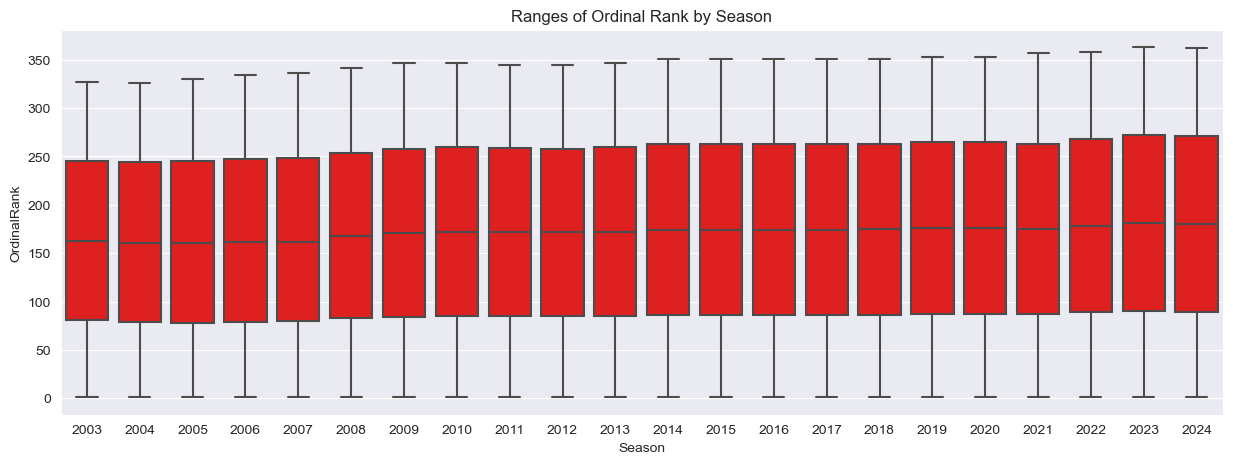

In [30]:
# Visual Inspection of Ordinal Rank by year
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("darkgrid")
sns.boxplot(x="Season", y="OrdinalRank", data=m_massey, color="red", ax=ax)
ax.set_title("Ranges of Ordinal Rank by Season");

In [38]:
# Possible means to consolidate the ranking systems, - computation heavy cell, so commented out

# top_20_systems = list(m_massey["SystemName"].value_counts(normalize=True)[:20].index)
# m_massey["SystemName"].apply(lambda x: x if x in top_20_systems else "Other").value_counts()[:5]

<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Data Section 5:</b> Supplemental Info
</div>

 1. **Men's Coaches (only men)**
 2. **Conferences**
 3. **M/W Teams Conferences (additional detail)**
 4. **Men's Conference Tournament Games**
 5. **Men's Secondary Tourney Teams**
 6. **Men's Sec Tourney Compact Results**
 7. **M/W Team Spellings**
 8. **M/W NCAA Tourney Slots**
 9. **Men's NCAA Tourney Seed Round Slots**


<hr style="border: 2px solid blue">

##### 1.) Men's Coaches
Use `Season`, `TeamID` to merge data on.

In [31]:
# Load
mens_coaches = pd.read_csv(os.path.join(path, 'MTeamCoaches.csv'))
# Inspect
print(mens_coaches.shape)
mens_coaches.head()

(13167, 5)


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney


<hr style="border: 2px solid blue">

##### 2.) Conferences:
51 rows, 2 columns for each distinct conference. 
- ConfAbbrev -> containing lowercase abbreviation, and 
- Description -> containing the full length conference name. 

In [32]:
# Load Data
conferences = pd.read_csv(os.path.join(path, 'Conferences.csv'))

# Inspect Data
print(conferences.shape)
conferences.head()

(51, 2)


,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


<hr style="border: 2px solid blue">

##### 3.) M/W Team Conferences
- Season
- TeamID
- ConfAbbrev -> used to access the "Description" from above dataframe: Full Name String

In [33]:
# Load
mens_conferences = pd.read_csv(os.path.join(path, 'MTeamConferences.csv')).assign(League="Men")
womens_conferences = pd.read_csv(os.path.join(path, 'WTeamConferences.csv')).assign(League="Women")
# Inspect
print(mens_conferences.shape)
print(mens_conferences.head())

# Same data, just not going back as far
womens_conferences.head()

(13024, 4)
   Season  TeamID ConfAbbrev League
0    1985    1102        wac    Men
1    1985    1103        ovc    Men
2    1985    1104        sec    Men
3    1985    1106       swac    Men
4    1985    1108       swac    Men


,Season,TeamID,ConfAbbrev,League
0,1998,3102,wac,Women
1,1998,3103,mac,Women
2,1998,3104,sec,Women
3,1998,3106,swac,Women
4,1998,3108,swac,Women


In [34]:
# Combined Data

combined_conferences = pd.concat([mens_conferences, womens_conferences])
combined_conferences

,Season,TeamID,ConfAbbrev,League
0,1985,1102,wac,Men
1,1985,1103,ovc,Men
2,1985,1104,sec,Men
3,1985,1106,swac,Men
4,1985,1108,swac,Men
...,...,...,...,...
9123,2024,3474,a_sun,Women
9124,2024,3475,ovc,Women
9125,2024,3476,nec,Women
9126,2024,3477,southland,Women


<hr style="border: 2px solid blue">

##### 4.) Men's (ONLY) Conference Tourney Games:
- Season -> Year of Record
- ConfAbbrev -> same as "conferences" df ConfAbbrev columns
- DayNum -> this integer always ranges from 0 to 132, day 132 is always SELECTION SUNDAY, day 0 is earliest first game of ALL seasons in the data
- WTeamID -> winning team ID for merging data
- LTeamID -> also for merging data

In [35]:
# Load Data
mens_conference_tourney_games = pd.read_csv(os.path.join(path, 'MConferenceTourneyGames.csv'))

# Inspect Data
print(mens_conference_tourney_games.shape) 
mens_conference_tourney_games.head(5)

(6189, 5)


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273


<hr style="border: 2px solid blue">

##### 5.) Men's Secondary Tourney Teams
"Many of these teams, especially in the NIT, were "bubble" teams of comparable strength to several NCAA® Tournament invitees, and so these games may be of use in model optimization for predicting NCAA® Tournament results. Also note that this information could be determined just from inspecting the MSecondaryTourneyCompactResults file, but is presented in this file as well, for your convenience." - *Kaggle Data Guide*

- Season -> year, int
- SecondaryTourney - Abbr of tournament, str
- TeamID -> unique key

In [36]:
# Load
mens_secondary_tourney_teams = pd.read_csv(os.path.join(path, 'MSecondaryTourneyTeams.csv'))

#Inspect
print(mens_secondary_tourney_teams.shape)
mens_secondary_tourney_teams.head()

(1780, 3)


,Season,SecondaryTourney,TeamID
0,1985,NIT,1108
1,1985,NIT,1133
2,1985,NIT,1139
3,1985,NIT,1145
4,1985,NIT,1151


In [37]:
# These are all inconsequential for making predictions about the NCAA tournament
mens_secondary_tourney_teams["SecondaryTourney"].value_counts()

SecondaryTourney
NIT    1240
CIT     282
CBI     232
TBC      18
V16       8
Name: count, dtype: int64

<hr style="border: 2px solid blue">

##### 6.) Men's (ONLY) Secondary Tourney Compact Results
Standard format of the information, this likely won't have any bearing on our NCAA bracket predictions.

In [38]:
# Load
mens_sec_tourney_compact = pd.read_csv(os.path.join(path, "MSecondaryTourneyCompactResults.csv"))
print(mens_sec_tourney_compact.shape)
mens_sec_tourney_compact.head()

(1756, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT
3,1985,136,1231,79,1139,57,H,0,NIT
4,1985,136,1249,78,1222,71,H,0,NIT


In [39]:
# None of these tournaments matter for NCAA predictions, fwiw
mens_sec_tourney_compact['SecondaryTourney'].value_counts()

SecondaryTourney
NIT     1219
CIT      271
CBI      239
TBC       17
V16        7
NIT        3
Name: count, dtype: int64

<hr style="border: 2px solid blue">

##### 7.) Team Spellings - MEN AND WOMEN: Probably don't use


- TeamNameSpelling -> multiple spellings per team, seems unnecessary at first glance
- TeamID -> same identifier

In [40]:
# Load -> different encoding required to read this file in correctly
men_team_spelling = pd.read_csv(os.path.join(path, "MTeamSpellings.csv"), encoding="latin1").assign(League="Men")
women_team_spelling = pd.read_csv(os.path.join(path, "WTeamSpellings.csv"), encoding="latin1").assign(League="Women")

# Inspect
print(men_team_spelling.shape)
print(men_team_spelling.head())

women_team_spelling.head()

(1165, 3)
     TeamNameSpelling  TeamID League
0    a&m-corpus chris    1394    Men
1  a&m-corpus christi    1394    Men
2         abilene chr    1101    Men
3   abilene christian    1101    Men
4   abilene-christian    1101    Men


,TeamNameSpelling,TeamID,League
0,a&m-corpus chris,3394,Women
1,a&m-corpus christi,3394,Women
2,abilene chr,3101,Women
3,abilene christian,3101,Women
4,abilene-christian,3101,Women


In [41]:
# Combined Data

spellings = pd.concat([men_team_spelling, women_team_spelling])
spellings

,TeamNameSpelling,TeamID,League
0,a&m-corpus chris,1394,Men
1,a&m-corpus christi,1394,Men
2,abilene chr,1101,Men
3,abilene christian,1101,Men
4,abilene-christian,1101,Men
...,...,...,...
1153,youngstown st,3464,Women
1154,youngstown st.,3464,Women
1155,youngstown state,3464,Women
1156,youngstown-st,3464,Women


<hr style="border: 2px solid blue">

##### 8.) Tourney Slots - MEN AND WOMEN
- Season
- Slot -> Round and Region along with respective games, i.e. R2Y4, respective game resets to "1" each round
- StrongSeed -> Higher seed in the game
- WeakSeed -> Lower seed in the game

In [42]:
# Load
men_tourney_slots = pd.read_csv(os.path.join(path, "MNCAATourneySlots.csv")).assign(League="Men")
women_tourney_slots = pd.read_csv(os.path.join(path, "WNCAATourneySlots.csv")).assign(League="Women")

# Inspect
print(men_tourney_slots.shape)
print(men_tourney_slots.head())

# Same info, illustrates how game resets to a count 1-n for n games in a given round
women_tourney_slots[30:35]

(2452, 5)
   Season  Slot StrongSeed WeakSeed League
0    1985  R1W1        W01      W16    Men
1    1985  R1W2        W02      W15    Men
2    1985  R1W3        W03      W14    Men
3    1985  R1W4        W04      W13    Men
4    1985  R1W5        W05      W12    Men


,Season,Slot,StrongSeed,WeakSeed,League
30,1998,R1Z7,Z07,Z10,Women
31,1998,R1Z8,Z08,Z09,Women
32,1998,R2W1,R1W1,R1W8,Women
33,1998,R2W2,R1W2,R1W7,Women
34,1998,R2W3,R1W3,R1W6,Women


In [43]:
# Combined Data 

tourney_slots = pd.concat([men_tourney_slots, women_tourney_slots])
tourney_slots

,Season,Slot,StrongSeed,WeakSeed,League
0,1985,R1W1,W01,W16,Men
1,1985,R1W2,W02,W15,Men
2,1985,R1W3,W03,W14,Men
3,1985,R1W4,W04,W13,Men
4,1985,R1W5,W05,W12,Men
...,...,...,...,...,...
1641,2023,R6CH,R5WX,R5YZ,Women
1642,2023,W11,W11a,W11b,Women
1643,2023,X16,X16a,X16b,Women
1644,2023,Y16,Y16a,Y16b,Women


<hr style="border: 2px solid blue">

##### 9.) Men's Tournament Seed Rounded Slots
Kind of strange data to consolidate. 

In [44]:
# Load
men_tourney_seed_rounded_slots = pd.read_csv(os.path.join(path, 'MNCAATourneySeedRoundSlots.csv')).assign(League="Men")

# Inspect
print(men_tourney_seed_rounded_slots.shape)
men_tourney_seed_rounded_slots.head()

(720, 6)


,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum,League
0,W01,1,R1W1,136,137,Men
1,W01,2,R2W1,138,139,Men
2,W01,3,R3W1,143,144,Men
3,W01,4,R4W1,145,146,Men
4,W01,5,R5WX,152,152,Men


<hr style="border: 2px solid blue">

### Load-in Summary
All of the different data files have officially been loaded into this notebook. For the most part, there are key identifiers that will allow for the tables to be merged into one main dataframe. I will attempt to create a dataframe with a team's aggregated season statistics, and then begin the process of building models. 

<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em; color: White; background-color: black;">
<b>Creating a Merged Dataframe:</b>
</div>

### Merging the data:
I will take the data in its current format, and modify and aggregate it into a format that I can use to train a model.
The dataset should have 1 row per each tournament game containing features about each team, and which team won the game. 

To begin consolidating the data, I will combine:
- Reg Season Detailed Results
- Tourney Detailed Results
- Tourney Seeds
- 2024 Tournament Seeds

In [45]:
# Regular season detailed

# Allow for more detailed inspection of columns
pd.set_option("display.max_columns", 75)
reg_seas_detailed

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,League
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,Men
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,Men
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,Men
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,Men
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75500,2024,114,3409,76,3396,67,A,0,24,59,9,26,19,22,6,30,11,18,3,12,13,27,74,2,16,11,17,13,26,14,11,11,3,18,Women
75501,2024,114,3424,63,3129,57,H,0,26,60,4,19,7,9,6,21,13,10,9,2,15,24,56,5,17,4,9,8,22,7,15,5,4,12,Women
75502,2024,114,3433,69,3348,59,A,0,27,62,7,17,8,10,11,15,10,7,9,3,13,22,53,1,15,14,16,10,14,12,13,4,5,10,Women
75503,2024,114,3453,70,3236,61,A,0,28,58,7,21,7,10,8,23,19,10,8,8,8,23,63,11,31,4,4,13,20,10,15,7,3,15,Women


##### Creating 1 row for each team
This will be accomplished by selecting the pertinent feature columns for the winning team and for the losing team and stacking them vertically. This separation makes each row/observation 1 team's data as opposed to a full game as an observation. After the features for individual teams are engineered and selected, I will aggregate season statistics for each team.

In [47]:
# I will vertically combine "TeamID" and "OppTeamID" statsics
reg_seas_detailed.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'League'],
      dtype='object')

In [48]:
# Creating and additional second row for winning and losing team observations

df = pd.concat([
    reg_seas_detailed[["Season", "League", "WTeamID", "DayNum", "WScore", "LScore", 'WLoc', \
                       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', \
                       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', \
                       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].assign(\
        GameResult="Win").rename(columns={
        "WTeamID": "TeamID",
        "WScore":"TeamScore",
        "LScore":"OppScore",
        'WLoc': "Win_Location",
        'WFGM': "FG_Made",
        'WFGA': "FG_Attempted",
        'WFGM3':"3pt_Made",
        'WFGA3':"3pt_Attempted",
        'WFTM':"FT_Made",
        'WFTA':"FT_Attempted",
        'WOR':"Off_Rebs",
        'WDR':"Def_Rebs",
        'WAst':"Assists",
        'WTO':"Turnovers",
        'WStl':"Steals",
        'WBlk':"Blocks",
        'WPF':"Fouls",
        'LFGM': 'Opp_FG_Made', 
        'LFGA': 'Opp_FG_Attempted',
        'LFGM3': 'Opp_3pt_Made', 
        'LFGA3': 'Opp_3pt_Attempted',
       'LFTM': 'Opp_FT_Made', 
        'LFTA': 'Opp_FT_Attempted', 
        'LOR': 'Opp_Off_Rebs', 
        'LDR': 'Opp_Def_Rebs', 
        'LAst': 'Opp_Assists', 
        'LTO': 'Opp_Turnovers', 
        'LStl': 'Opp_Steals', 
        'LBlk': 'Opp_Blocks', 
        'LPF': 'Opp_Fouls'
                
    }),\
     reg_seas_detailed[["Season", "League", "LTeamID", "DayNum", "LScore", "WScore", 'WLoc',\
                            'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR',\
                            'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',\
                        'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].assign(\
         GameResult="Loss").rename(columns={
        "LTeamID": "TeamID",
        "LScore":"TeamScore",
        "WScore":"OppScore",
        'WLoc': "Win_Location",
        'LFGM': "FG_Made",
        'LFGA': "FG_Attempted",
        'LFGM3':"3pt_Made",
        'LFGA3':"3pt_Attempted",
        'LFTM':"FT_Made",
        'LFTA':"FT_Attempted",
        'LOR':"Off_Rebs",
        'LDR':"Def_Rebs",
        'LAst':"Assists",
        'LTO':"Turnovers",
        'LStl':"Steals",
        'LBlk':"Blocks",
        'LPF':"Fouls",
        'WFGM': 'Opp_FG_Made', 
        'WFGA': 'Opp_FG_Attempted',
        'WFGM3': 'Opp_3pt_Made', 
        'WFGA3': 'Opp_3pt_Attempted',
       'WFTM': 'Opp_FT_Made', 
        'WFTA': 'Opp_FT_Attempted', 
        'WOR': 'Opp_Off_Rebs', 
        'WDR': 'Opp_Def_Rebs', 
        'WAst': 'Opp_Assists', 
        'WTO': 'Opp_Turnovers', 
        'WStl': 'Opp_Steals', 
        'WBlk': 'Opp_Blocks', 
        'WPF': 'Opp_Fouls'
     }
    )
    
], ignore_index=True
)

print(df.shape)
df.head()

(376018, 35)


,Season,League,TeamID,DayNum,TeamScore,OppScore,Win_Location,NumOT,FG_Made,FG_Attempted,3pt_Made,3pt_Attempted,FT_Made,FT_Attempted,Off_Rebs,Def_Rebs,Assists,Turnovers,Steals,Blocks,Fouls,Opp_FG_Made,Opp_FG_Attempted,Opp_3pt_Made,Opp_3pt_Attempted,Opp_FT_Made,Opp_FT_Attempted,Opp_Off_Rebs,Opp_Def_Rebs,Opp_Assists,Opp_Turnovers,Opp_Steals,Opp_Blocks,Opp_Fouls,GameResult
0,2003,Men,1104,10,68,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,Win
1,2003,Men,1272,10,70,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,Win
2,2003,Men,1266,11,73,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,Win
3,2003,Men,1296,11,56,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,Win
4,2003,Men,1400,11,77,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,Win


<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Engineering Features:</b>
</div>

The data now has one row for each team per game played. We can group this data by season, league, and TeamId to aggregate statistics for the team. Before I do that, I would like to engineer some additional features and merge other information from some of the other dataframes prior to aggregation. Some of these features may prove superfluous, but I will include them for the time being, and exclude them at the point that modeling begins. 

**Features I would like to create:**
- Wins
- Losses
- Win % -> can be calculated after aggregation
- Home/Road Win % -> can be calculated after aggregation, but need to create H/R/N binary column
- Wins/Losses recently (say a month) before tourney
- Performance in conference tourney -> we will see 
- Performance in tourney prior year
- Avg/std pts
- Avg/std of opponent pts
- Avg/std pt differential
- Detailed stats
- Num championships in the past
- Play-in team?
- Longest win-streak in season


### Cell for adding new features

In [49]:
# # Whole cell takes a couple of minutes to run

# # # # New Feature - point differential
df["Pt_Diff"] = df["TeamScore"] - df["OppScore"]

# # # # Win Counter
df["Win"] = (df["GameResult"] == "Win").astype("int8")

# # # Loss Counter
df["Loss"] = (df["GameResult"] == "Loss").astype("int8")

# # # Wins by location
df["home_win"] = ((df["GameResult"] == "Win") & (df["Win_Location"] == "H")).astype("int8")
df["neutral_win"] = ((df["GameResult"] == "Win") & (df["Win_Location"] == "N")).astype("int8")
df["road_win"] = ((df["GameResult"] == "Win") & (df["Win_Location"] == "A")).astype("int8")

# # # # Losses by location
df["home_loss"] = ((df["GameResult"] == "Loss") & (df["Win_Location"] == "A")).astype("int8")
df["neutral_loss"] = ((df["GameResult"] == "Loss") & (df["Win_Location"] == "N")).astype("int8")
df["road_loss"] = ((df["GameResult"] == "Loss") & (df["Win_Location"] == "H")).astype("int8")

# # Overtime wins
df["OT_Win"] = ((df["NumOT"] > 0) & (df["GameResult"] == "Win")).astype('int8')
df["OT_Loss"] = ((df["NumOT"] > 0) & (df["GameResult"] == "Loss")).astype('int8')

# # Win Streaks Initialization
df["win_streak"] = 0
df["losing_streak"] = 0

# # Putting the data in order because streaks and rolling features require the data to be sequential
df = df.sort_values(by=["TeamID", 'Season', "DayNum"]).reset_index(drop=True)

# Looping through the data to determine win/loss streaks
for idx, value in df.iterrows():
    if idx == 0 or df.loc[idx, "Season"] != df.loc[idx - 1, "Season"]:
        if df.loc[idx, "Win"] == 1:
            df.loc[idx, "win_streak"] = 1
            df.loc[idx, "losing_streak"] = 0
        else:
            df.loc[idx, "win_streak"] = 0
            df.loc[idx, "losing_streak"] = 1
    elif df.loc[idx, "Win"] == 1:
        df.loc[idx, "win_streak"] = df.loc[idx-1, "win_streak"] + 1
        df.loc[idx, "losing_streak"] = 0
    else:
        df.loc[idx, "win_streak"] = 0
        df.loc[idx, "losing_streak"] = df.loc[idx-1, "losing_streak"] + 1


# Season wins and losses for rolling windows
df["season_wins"] = df.groupby(["TeamID", "Season"])["Win"].transform("cumsum")
df["total_season_games"] = df.groupby(["TeamID", "Season"])["DayNum"].transform("cumcount") + 1
df["win_percentage"] = df["season_wins"] / df["total_season_games"]

# Last 10 games -> W/L and Pt. Diff
df["last_ten_games"] = df.groupby(["Season", "TeamID"])["win_percentage"].transform(lambda x: x.rolling(10).mean())
df["last_ten_pt_diff"] = df.groupby(["Season", "TeamID"])["Pt_Diff"].transform(lambda x: x.rolling(10).mean())    

# Last 5 games
df["last_five_games"] = df.groupby(["Season", "TeamID"])["win_percentage"].transform(lambda x: x.rolling(5).mean())
df["last_five_pt_diff"] = df.groupby(["Season", "TeamID"])["Pt_Diff"].transform(lambda x: x.rolling(5).mean())  

# 5 relative to 10 Trends
df["win_trend"] = (df["last_five_games"] > df["last_ten_games"]).map({True:"Uptrend", False:"Downtrend"})
df["diff_trend"] = (df["last_five_pt_diff"] > df["last_ten_pt_diff"]).map({True:"Uptrend", False:"Downtrend"})

# Close Games 
df["close_game"] = (df["Pt_Diff"].abs() <= 5).astype('int8')
df["close_win"] = ((df["close_game"] == 1) & (df["Pt_Diff"] > 0)).astype('int8')

(376018, 53)

"df.shape" should be = (376018, 53)

In [138]:
# If the 5 day trends are better than the 10 day trends, then we have an uptrend

# Winning Trend
df["win_trend"] = (df["last_five_games"] > df["last_ten_games"]).map({True:"Uptrend", False:"Downtrend"})

# Differential Trend
df["diff_trend"] = (df["last_five_pt_diff"] > df["last_ten_pt_diff"]).map({True:"Uptrend", False:"Downtrend"})

In [50]:
# Inspecting the transition between Season years (Indexes 20 - 21 illustrate the rolling over of the season)

df[5:25]

,Season,League,TeamID,DayNum,TeamScore,OppScore,Win_Location,NumOT,FG_Made,FG_Attempted,3pt_Made,3pt_Attempted,FT_Made,FT_Attempted,Off_Rebs,Def_Rebs,Assists,Turnovers,Steals,Blocks,Fouls,Opp_FG_Made,Opp_FG_Attempted,Opp_3pt_Made,Opp_3pt_Attempted,Opp_FT_Made,Opp_FT_Attempted,Opp_Off_Rebs,Opp_Def_Rebs,Opp_Assists,Opp_Turnovers,Opp_Steals,Opp_Blocks,Opp_Fouls,GameResult,Pt_Diff,Win,Loss,home_win,neutral_win,road_win,home_loss,neutral_loss,road_loss,OT_Win,OT_Loss,win_streak,losing_streak,season_wins,total_season_games,win_percentage,last_ten_games,last_ten_pt_diff
5,2014,Men,1101,21,65,93,H,0,23,53,9,24,10,14,3,18,11,11,3,3,24,33,57,6,13,21,36,16,29,18,8,8,7,16,Loss,-28,0,1,0,0,0,0,0,1,0,0,0,6,0,6,0.000000,NaN,NaN
6,2014,Men,1101,26,47,74,H,0,18,55,3,19,8,11,9,14,8,7,7,3,19,26,45,6,17,16,18,7,29,12,14,1,9,17,Loss,-27,0,1,0,0,0,0,0,1,0,0,0,7,0,7,0.000000,NaN,NaN
7,2014,Men,1101,66,81,87,H,0,28,63,7,23,18,25,7,26,20,11,7,1,32,24,51,7,17,32,45,9,33,13,13,2,3,22,Loss,-6,0,1,0,0,0,0,0,1,0,0,0,8,0,8,0.000000,NaN,NaN
8,2014,Men,1101,68,77,85,H,2,23,69,7,19,24,35,11,34,8,7,7,0,22,27,65,11,23,20,26,5,35,17,12,2,5,23,Loss,-8,0,1,0,0,0,0,0,1,0,1,0,9,0,9,0.000000,NaN,NaN
9,2014,Men,1101,73,59,82,A,0,19,47,5,10,16,18,8,15,5,14,3,3,17,29,54,6,14,18,24,13,21,10,11,8,6,15,Loss,-23,0,1,0,0,0,1,0,0,0,0,0,10,0,10,0.000000,0.000000,-23.1
10,2014,Men,1101,75,73,72,H,0,25,53,5,14,18,24,8,22,11,15,12,1,18,30,56,4,10,8,20,12,23,11,16,11,1,21,Win,1,1,0,1,0,0,0,0,0,0,0,1,0,1,11,0.090909,0.009091,-21.1
11,2014,Men,1101,80,57,65,A,0,18,43,5,14,16,23,8,22,6,22,9,2,22,23,48,1,2,18,22,6,21,7,17,5,4,18,Loss,-8,0,1,0,0,0,1,0,0,0,0,0,1,1,12,0.083333,0.017424,-19.1
12,2014,Men,1101,82,51,70,A,0,16,38,4,13,15,21,7,16,7,18,6,1,24,23,47,6,16,18,26,11,19,14,11,9,2,22,Loss,-19,0,1,0,0,0,1,0,0,0,0,0,2,1,13,0.076923,0.025117,-18.7
13,2014,Men,1101,87,48,64,H,0,14,44,3,9,17,23,11,20,5,21,6,5,17,23,60,8,25,10,14,18,22,20,16,11,11,20,Loss,-16,0,1,0,0,0,0,0,1,0,0,0,3,1,14,0.071429,0.032259,-14.1
14,2014,Men,1101,89,66,84,H,0,20,53,12,23,14,16,12,16,11,20,8,0,18,31,58,7,19,15,17,11,22,24,13,13,6,15,Loss,-18,0,1,0,0,0,0,0,1,0,0,0,4,1,15,0.066667,0.038926,-15.2


<hr style="border: 2px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Merging Data:</b>
</div>

##### Data to be merged:
- Conference info
- Coaches
- Massey Rankings

In [51]:
# Currently 53 columns that will be aggregated
df.shape

(376018, 53)

In [53]:
# Merging the conference info - Clean merge
df = df.merge(combined_conferences[["Season", "TeamID", "ConfAbbrev"]], on=["Season", "TeamID"], how="left")
df.shape

(376018, 54)

In [63]:
# Renaming a column for the purposes of merging data

# mens_coaches.rename(columns={"FirstDayNum":"DayNum"}, inplace=True)
mens_coaches.head(3)

,Season,TeamID,DayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson


In [64]:
# Coach Info for select Men's teams -> Fixed one-to-many issue
df = df.merge(mens_coaches[["Season", "TeamID", "DayNum", "CoachName"]], \
              on=["Season", "TeamID", "DayNum"], how="left")
df.shape

(376018, 55)

In [67]:
# Massey Rankings
# Rename column to use as key 
# m_massey.rename(columns={"RankingDayNum":"DayNum"}, inplace=True)

# Merge the data
df = df.merge(m_massey.groupby(["Season", "DayNum", "TeamID"])["OrdinalRank"]\
         .agg(["mean", "median", "min", "max"]), on=["Season", "TeamID", "DayNum"], how="left")\
        .rename(columns={"mean":"Avg_Ranking", 
                "median":"Median_Ranking", 
                "min":"Best_Ranking", 
                "max":"Worst_Ranking"})

df.shape

(376018, 59)

In [142]:
# 6 New Columns Added
df.shape

(376018, 65)

In [121]:
df.groupby(["Season", "TeamID"])["close_win"].sum() / df.groupby(["Season", "TeamID"])["close_game"].sum()

Season  TeamID
2003    1102      0.375000
        1103      0.500000
        1104      0.166667
        1105      0.222222
        1106      0.500000
                    ...   
2024    3474      0.400000
        3475      0.750000
        3476      0.333333
        3477      0.600000
        3478      0.750000
Length: 12857, dtype: float64

In [141]:
# Write the file
# df.to_csv(os.path.join(path, "Consolidated_Data.csv"))

### Load in the transformed data
This data is still *Pre-Aggregation* and contains details about each game in the data from both teams' perspectives, winning and losing. 

In [70]:
# Just an easier starting point for final aggregation
df = pd.read_csv(os.path.join(path, "Consolidated_Data.csv"), index_col=0)
df

,Season,League,TeamID,DayNum,TeamScore,OppScore,Win_Location,NumOT,FG_Made,FG_Attempted,3pt_Made,3pt_Attempted,FT_Made,FT_Attempted,Off_Rebs,Def_Rebs,Assists,Turnovers,Steals,Blocks,Fouls,Opp_FG_Made,Opp_FG_Attempted,Opp_3pt_Made,Opp_3pt_Attempted,Opp_FT_Made,Opp_FT_Attempted,Opp_Off_Rebs,Opp_Def_Rebs,Opp_Assists,Opp_Turnovers,Opp_Steals,Opp_Blocks,Opp_Fouls,GameResult,Pt_Diff,Win,Loss,home_win,neutral_win,road_win,home_loss,neutral_loss,road_loss,OT_Win,OT_Loss,win_streak,losing_streak,season_wins,total_season_games,win_percentage,last_ten_games,last_ten_pt_diff,ConfAbbrev,CoachName,Avg_Ranking,Median_Ranking,Best_Ranking,Worst_Ranking
0,2014,Men,1101,5,75,94,H,0,22,63,7,25,24,32,11,22,9,10,3,1,26,30,58,7,19,27,37,10,32,19,10,4,2,22,Loss,-19,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0.000000,NaN,NaN,southland,NaN,NaN,NaN,NaN,NaN
1,2014,Men,1101,7,47,75,H,0,14,40,4,16,15,26,11,17,7,18,2,1,30,25,56,2,14,23,32,18,22,15,9,7,7,23,Loss,-28,0,1,0,0,0,0,0,1,0,0,0,2,0,2,0.000000,NaN,NaN,southland,NaN,NaN,NaN,NaN,NaN
2,2014,Men,1101,9,44,67,H,0,17,54,10,21,0,0,6,17,9,16,6,0,15,26,53,4,18,11,17,14,27,12,17,9,10,8,Loss,-23,0,1,0,0,0,0,0,1,0,0,0,3,0,3,0.000000,NaN,NaN,southland,NaN,343.928571,347.0,332.0,351.0
3,2014,Men,1101,13,41,103,H,0,14,54,3,23,10,12,10,20,6,19,3,0,21,38,61,9,21,18,22,5,31,25,5,11,5,10,Loss,-62,0,1,0,0,0,0,0,1,0,0,0,4,0,4,0.000000,NaN,NaN,southland,NaN,NaN,NaN,NaN,NaN
4,2014,Men,1101,15,64,71,H,0,19,50,9,20,17,25,11,26,13,13,4,2,26,22,48,3,13,24,37,8,25,11,6,7,3,20,Loss,-7,0,1,0,0,0,0,0,1,0,0,0,5,0,5,0.000000,NaN,NaN,southland,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376013,2024,Women,3478,95,72,51,H,0,27,65,8,23,10,11,13,18,15,10,14,5,12,19,53,3,16,10,15,11,23,11,21,5,0,8,Win,21,1,0,1,0,0,0,0,0,0,0,1,0,10,23,0.434783,0.352059,8.1,nec,NaN,NaN,NaN,NaN,NaN
376014,2024,Women,3478,101,69,54,A,0,22,47,6,13,19,20,8,25,13,10,7,5,11,18,58,8,25,10,12,11,14,14,10,1,2,15,Win,15,1,0,0,0,1,0,0,0,0,0,2,0,11,24,0.458333,0.376464,8.3,nec,NaN,NaN,NaN,NaN,NaN
376015,2024,Women,3478,103,55,44,A,0,19,60,3,13,14,17,16,25,10,7,6,2,11,17,50,6,23,4,10,5,21,15,13,3,3,15,Win,11,1,0,0,0,1,0,0,0,0,0,3,0,12,25,0.480000,0.397797,7.9,nec,NaN,NaN,NaN,NaN,NaN
376016,2024,Women,3478,108,58,45,H,0,24,57,3,18,7,12,6,16,16,12,11,3,14,16,54,4,19,9,10,13,29,6,25,5,3,15,Win,13,1,0,1,0,0,0,0,0,0,0,4,0,13,26,0.500000,0.416547,8.8,nec,NaN,NaN,NaN,NaN,NaN


<hr style="border: 3px solid blue">

### Aggregation of Data
There are many features and different ways to aggregate this data. Here is a list of what I am planning to do:
- AvgTeamScore
- StdDevTeamScore
- AvgOppScore
- StdDevOppScore

- AvgFGMade
- AvgFGAtt
- TotalFGMade
- TotalFGAtt

- Avg3ptMade
- Avg3ptAtt
- Total3ptMade
- Total3ptAtt

- Avg_FT_Made
- Avg_FT_Att
- Total_FT_Made
- Total_FT_Att

- Avg_Off_Rebs
- Total_Off_Rebs
- Avg_Def_Rebs
- Total_Def_Rebs

- Avg_Assts
- Total_Assts
- Avg_TO
- Total_TO

- Avg_Steals
- Avg_Blocks
- Avg_Fouls

**Then the same statistics for "Opponents_(statistic)" followed by additional aggregation for:**
- Avg_Pt_Diff
- Median_Pt_Diff
- Std_Pt_Diff

- Win_Total
- Loss_Total
- HomeWins
- HomeLoss
- RoadWins
- RoadLoss
- NeutralSiteWins
- NeutralSiteLoss
- OTWins
- OTLoss

- MaxWStreak
- MaxLStreak

- LastTenWinPerc (Last)
- LastTenPtDiff (Last)

- Conference (mode)
- Coach (Last)
- MedianRanking (Med)
- BestRanking (min)
- WorstRanking (max)

In [222]:
# Aggregated dataframe of regular season information

df_agg = df.groupby(["Season", 'TeamID']).agg(\
                                           AvgTeamScore = ("TeamScore", "mean"), # Own Team
                                              StdDevTeamScore = ("TeamScore", "std"),
                                              AvgOppScore = ("OppScore", "mean"), # Opponent
                                              StdDevOppScore = ("OppScore", "std"),
                                              AvgFGMade = ("FG_Made", "mean"),
                                              AvgFGAtt = ("FG_Attempted", "mean"),
                                              TotalFGMade = ("FG_Made", "sum"),
                                              TotalFGAtt = ("FG_Attempted", "sum"),
                                              Avg3ptMade = ("3pt_Made", "mean"),
                                              Avg3ptAtt = ('3pt_Attempted', "mean"),
                                              Total3ptMade = ("3pt_Made", "sum"),
                                              Total3ptAtt = ('3pt_Attempted', "sum"),
                                              Avg_FT_Made = ('FT_Made', "mean"),
                                              Avg_FT_Att = ('FT_Attempted', "mean"),
                                              Total_FT_Made = ('FT_Made', "sum"),
                                              Total_FT_Att = ('FT_Attempted', "sum"),
                                              Avg_Off_Rebs = ('Off_Rebs', "mean"),
                                              Total_Off_Rebs = ('Off_Rebs', "sum"),
                                              Avg_Def_Rebs = ('Def_Rebs', "mean"),
                                              Total_Def_Rebs = ('Def_Rebs', "sum"),
                                              Avg_Assts = ('Assists', "mean"),
                                              Total_Assts = ('Assists', "sum"),
                                              Avg_TO = ('Turnovers', "mean"),
                                              Total_TO = ('Turnovers', "sum"),
                                              Avg_Steals = ('Steals', "mean"),
                                              Avg_Blocks = ('Blocks', "mean"),
                                              Avg_Fouls = ('Fouls', "mean"),
                                              
                                              OppAvgFGMade = ("Opp_FG_Made", "mean"), # Same stats for opponents
                                              OppAvgFGAtt = ("Opp_FG_Attempted", "mean"),
                                              OppTotalFGMade = ("Opp_FG_Made", "sum"),
                                              OppTotalFGAtt = ("Opp_FG_Attempted", "sum"),
                                              OppAvg3ptMade = ("Opp_3pt_Made", "mean"),
                                              OppAvg3ptAtt = ('Opp_3pt_Attempted', "mean"),
                                              OppTotal3ptMade = ("Opp_3pt_Made", "sum"),
                                              OppTotal3ptAtt = ('Opp_3pt_Attempted', "sum"),
                                              OppAvg_FT_Made = ('Opp_FT_Made', "mean"),
                                              OppAvg_FT_Att = ('Opp_FT_Attempted', "mean"),
                                              OppTotal_FT_Made = ('Opp_FT_Made', "sum"),
                                              OppTotal_FT_Att = ('Opp_FT_Attempted', "sum"),
                                              OppAvg_Off_Rebs = ('Opp_Off_Rebs', "mean"),
                                              OppTotal_Off_Rebs = ('Opp_Off_Rebs', "sum"),
                                              OppAvg_Def_Rebs = ('Opp_Def_Rebs', "mean"),
                                              OppTotal_Def_Rebs = ('Opp_Def_Rebs', "sum"),
                                              OppAvg_Assts = ('Opp_Assists', "mean"),
                                              OppTotal_Assts = ('Opp_Assists', "sum"),
                                              OppAvg_TO = ('Opp_Turnovers', "mean"),
                                              OppTotal_TO = ('Opp_Turnovers', "sum"),
                                              OppAvg_Steals = ('Opp_Steals', "mean"),
                                              OppAvg_Blocks = ('Opp_Blocks', "mean"),
                                              OppAvg_Fouls = ('Opp_Fouls', "mean"),
                                              
                                              AvgPtDiff = ("Pt_Diff", "mean"),
                                              MedPtDiff = ("Pt_Diff", "median"),
                                              StdPtDiff = ("Pt_Diff", "std"),
                                              Win_Total = ("Win", "sum"),
                                              Loss_Total = ("Loss", "sum"),
                                              HomeWins = ("home_win", 'sum'),
                                              HomeLoss = ("home_loss", 'sum'),
                                              RoadWins = ("road_win", 'sum'),
                                              RoadLoss = ("road_loss", 'sum'),
                                              NeutralWins = ("neutral_win", 'sum'),
                                              NeutralLoss = ("neutral_loss", 'sum'),
                                              OTWins = ("OT_Win", "sum"),
                                              OTLoss = ("OT_Loss", "sum"),
                                              CloseGames = ("close_game", "sum"),
                                              CloseWins = ("close_win", "sum"),
                                              MaxWStreak = ("win_streak", "max"),
                                              MaxLStreak = ("losing_streak", "max"),
                                              LastTenWinPerc = ("last_ten_games", "last"),
                                              LastFiveWinPerc = ("last_five_games", "last"),
                                              WinTrend = ("win_trend", "last"),
                                              LastTenPtDiff = ("last_ten_pt_diff", 'last'),
                                              LastFivePtDiff =("last_five_pt_diff", "last"),
                                              DiffTrend= ("diff_trend", "last"),
                                              Conference = ("ConfAbbrev", "last"),
                                              Coach = ('CoachName', "last"),
                                              MedianRanking = ('Median_Ranking', "last"),
                                              BestRanking = ('Best_Ranking', "last"),
                                              WorstRanking = ("Worst_Ranking", "last")
                                              
                                              
                                             ).reset_index()

df_agg

,Season,TeamID,AvgTeamScore,StdDevTeamScore,AvgOppScore,StdDevOppScore,AvgFGMade,AvgFGAtt,TotalFGMade,TotalFGAtt,Avg3ptMade,Avg3ptAtt,Total3ptMade,Total3ptAtt,Avg_FT_Made,Avg_FT_Att,Total_FT_Made,Total_FT_Att,Avg_Off_Rebs,Total_Off_Rebs,Avg_Def_Rebs,Total_Def_Rebs,Avg_Assts,Total_Assts,Avg_TO,Total_TO,Avg_Steals,Avg_Blocks,Avg_Fouls,OppAvgFGMade,OppAvgFGAtt,OppTotalFGMade,OppTotalFGAtt,OppAvg3ptMade,OppAvg3ptAtt,OppTotal3ptMade,OppTotal3ptAtt,OppAvg_FT_Made,OppAvg_FT_Att,OppTotal_FT_Made,OppTotal_FT_Att,OppAvg_Off_Rebs,OppTotal_Off_Rebs,OppAvg_Def_Rebs,OppTotal_Def_Rebs,OppAvg_Assts,OppTotal_Assts,OppAvg_TO,OppTotal_TO,OppAvg_Steals,OppAvg_Blocks,OppAvg_Fouls,AvgPtDiff,MedPtDiff,StdPtDiff,Win_Total,Loss_Total,HomeWins,HomeLoss,RoadWins,RoadLoss,NeutralWins,NeutralLoss,OTWins,OTLoss,CloseGames,CloseWins,MaxWStreak,MaxLStreak,LastTenWinPerc,LastFiveWinPerc,WinTrend,LastTenPtDiff,LastFivePtDiff,DiffTrend,Conference,Coach,MedianRanking,BestRanking,WorstRanking
0,2003,1102,57.250000,13.892777,57.000000,12.232319,19.142857,39.785714,536,1114,7.821429,20.821429,219,583,11.142857,17.107143,312,479,4.178571,117,16.821429,471,13.000000,364,11.428571,320,5.964286,1.785714,18.750000,19.285714,42.428571,540,1188,4.750000,12.428571,133,348,13.678571,19.250000,383,539,9.607143,269,20.142857,564,9.142857,256,12.964286,363,5.428571,1.571429,18.357143,0.250000,-3.0,16.169530,12,16,9,4,3,10,0,2,0,0,8,3,4,5,0.472281,0.438885,Downtrend,-8.0,-3.6,Uptrend,mwc,None,158.0,144.0,169.0
1,2003,1103,78.777778,15.272734,78.148148,12.790332,27.148148,55.851852,733,1508,5.444444,16.074074,147,434,19.037037,25.851852,514,698,9.777778,264,19.925926,538,15.222222,411,12.629630,341,7.259259,2.333333,19.851852,27.777778,57.000000,750,1539,6.666667,18.370370,180,496,15.925926,22.148148,430,598,12.037037,325,22.037037,595,15.481481,418,15.333333,414,6.407407,2.851852,22.444444,0.629630,-2.0,11.337983,13,14,9,5,4,9,0,0,3,1,12,6,4,4,0.478654,0.495948,Uptrend,0.6,3.6,Uptrend,mac,None,166.5,152.0,171.0
2,2003,1104,69.285714,11.375273,65.000000,8.645273,24.035714,57.178571,673,1601,6.357143,19.857143,178,556,14.857143,20.928571,416,586,13.571429,380,23.928571,670,12.107143,339,13.285714,372,6.607143,3.785714,18.035714,23.250000,55.500000,651,1554,6.357143,19.142857,178,536,12.142857,17.142857,340,480,10.892857,305,22.642857,634,11.678571,327,13.857143,388,5.535714,3.178571,19.250000,4.285714,6.0,13.391145,17,11,13,2,1,8,3,1,1,0,6,1,9,3,0.644503,0.631124,Downtrend,1.1,5.0,Uptrend,sec,None,35.0,35.0,35.0
3,2003,1105,71.769231,13.051614,76.653846,14.005548,24.384615,61.615385,634,1602,7.576923,20.769231,197,540,15.423077,21.846154,401,568,13.500000,351,23.115385,601,14.538462,378,18.653846,485,9.307692,2.076923,20.230769,27.000000,58.961538,702,1533,6.269231,17.538462,163,456,16.384615,24.500000,426,637,13.192308,343,26.384615,686,15.807692,411,18.807692,489,9.384615,4.192308,19.076923,-4.884615,-3.5,15.860207,7,19,5,7,2,12,0,0,0,3,9,2,2,6,0.277992,0.283595,Uptrend,-0.2,-0.8,Downtrend,swac,None,309.0,304.0,313.0
4,2003,1106,63.607143,11.402856,63.750000,12.636294,23.428571,55.285714,656,1548,6.107143,17.642857,171,494,10.642857,16.464286,298,461,12.285714,344,23.857143,668,11.678571,327,17.035714,477,8.357143,3.142857,18.178571,21.714286,53.392857,608,1495,4.785714,15.214286,134,426,15.535714,21.964286,435,615,11.321429,317,22.357143,626,11.785714,330,15.071429,422,8.785714,3.178571,16.142857,-0.142857,-1.0,12.601335,13,15,8,4,5,9,0,2,1,0,10,5,7,5,0.487403,0.469128,Downtrend,0.1,-2.2,Downtrend,swac,None,262.0,212.0,293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12852,2024,3474,58.720000,10.382357,72.520000,14.012257,21.440000,60.520000,536,1513,3.840000,14.960000,96,374,12.000000,18.200000,300,4

### Next Step - Merging Seed Information

In [225]:
# Next step is transferring Seeding information to our aggregated dataframe, sending both alpha-numeric and numeric
all_seeds["Chalk_Seed"] = all_seeds["Seed"].str.replace("a", "").str.replace("b", "").str[1:].astype("int16")
all_seeds.head()

,Season,Seed,TeamID,League,Chalk_Seed
0,1985,W01,1207,Men,1
1,1985,W02,1210,Men,2
2,1985,W03,1228,Men,3
3,1985,W04,1260,Men,4
4,1985,W05,1374,Men,5


In [227]:
# Merging Historical Seed Data - Chalk Seed and Seed added

df_agg = df_agg.merge(all_seeds[["Chalk_Seed", "Seed", "Season", "TeamID"]], on=["Season", "TeamID"], how="left")

In [229]:
# Inspection

df_agg.head()

,Season,TeamID,AvgTeamScore,StdDevTeamScore,AvgOppScore,StdDevOppScore,AvgFGMade,AvgFGAtt,TotalFGMade,TotalFGAtt,Avg3ptMade,Avg3ptAtt,Total3ptMade,Total3ptAtt,Avg_FT_Made,Avg_FT_Att,Total_FT_Made,Total_FT_Att,Avg_Off_Rebs,Total_Off_Rebs,Avg_Def_Rebs,Total_Def_Rebs,Avg_Assts,Total_Assts,Avg_TO,Total_TO,Avg_Steals,Avg_Blocks,Avg_Fouls,OppAvgFGMade,OppAvgFGAtt,OppTotalFGMade,OppTotalFGAtt,OppAvg3ptMade,OppAvg3ptAtt,OppTotal3ptMade,OppTotal3ptAtt,OppAvg_FT_Made,OppAvg_FT_Att,OppTotal_FT_Made,OppTotal_FT_Att,OppAvg_Off_Rebs,OppTotal_Off_Rebs,OppAvg_Def_Rebs,OppTotal_Def_Rebs,OppAvg_Assts,OppTotal_Assts,OppAvg_TO,OppTotal_TO,OppAvg_Steals,OppAvg_Blocks,OppAvg_Fouls,AvgPtDiff,MedPtDiff,StdPtDiff,Win_Total,Loss_Total,HomeWins,HomeLoss,RoadWins,RoadLoss,NeutralWins,NeutralLoss,OTWins,OTLoss,CloseGames,CloseWins,MaxWStreak,MaxLStreak,LastTenWinPerc,LastFiveWinPerc,WinTrend,LastTenPtDiff,LastFivePtDiff,DiffTrend,Conference,Coach,MedianRanking,BestRanking,WorstRanking,Chalk_Seed,Seed
0,2003,1102,57.250000,13.892777,57.000000,12.232319,19.142857,39.785714,536,1114,7.821429,20.821429,219,583,11.142857,17.107143,312,479,4.178571,117,16.821429,471,13.000000,364,11.428571,320,5.964286,1.785714,18.750000,19.285714,42.428571,540,1188,4.750000,12.428571,133,348,13.678571,19.250000,383,539,9.607143,269,20.142857,564,9.142857,256,12.964286,363,5.428571,1.571429,18.357143,0.250000,-3.0,16.169530,12,16,9,4,3,10,0,2,0,0,8,3,4,5,0.472281,0.438885,Downtrend,-8.0,-3.6,Uptrend,mwc,None,158.0,144.0,169.0,NaN,NaN
1,2003,1103,78.777778,15.272734,78.148148,12.790332,27.148148,55.851852,733,1508,5.444444,16.074074,147,434,19.037037,25.851852,514,698,9.777778,264,19.925926,538,15.222222,411,12.629630,341,7.259259,2.333333,19.851852,27.777778,57.000000,750,1539,6.666667,18.370370,180,496,15.925926,22.148148,430,598,12.037037,325,22.037037,595,15.481481,418,15.333333,414,6.407407,2.851852,22.444444,0.629630,-2.0,11.337983,13,14,9,5,4,9,0,0,3,1,12,6,4,4,0.478654,0.495948,Uptrend,0.6,3.6,Uptrend,mac,None,166.5,152.0,171.0,NaN,NaN
2,2003,1104,69.285714,11.375273,65.000000,8.645273,24.035714,57.178571,673,1601,6.357143,19.857143,178,556,14.857143,20.928571,416,586,13.571429,380,23.928571,670,12.107143,339,13.285714,372,6.607143,3.785714,18.035714,23.250000,55.500000,651,1554,6.357143,19.142857,178,536,12.142857,17.142857,340,480,10.892857,305,22.642857,634,11.678571,327,13.857143,388,5.535714,3.178571,19.250000,4.285714,6.0,13.391145,17,11,13,2,1,8,3,1,1,0,6,1,9,3,0.644503,0.631124,Downtrend,1.1,5.0,Uptrend,sec,None,35.0,35.0,35.0,10.0,Y10
3,2003,1105,71.769231,13.051614,76.653846,14.005548,24.384615,61.615385,634,1602,7.576923,20.769231,197,540,15.423077,21.846154,401,568,13.500000,351,23.115385,601,14.538462,378,18.653846,485,9.307692,2.076923,20.230769,27.000000,58.961538,702,1533,6.269231,17.538462,163,456,16.384615,24.500000,426,637,13.192308,343,26.384615,686,15.807692,411,18.807692,489,9.384615,4.192308,19.076923,-4.884615,-3.5,15.860207,7,19,5,7,2,12,0,0,0,3,9,2,2,6,0.277992,0.283595,Uptrend,-0.2,-0.8,Downtrend,swac,None,309.0,304.0,313.0,NaN,NaN
4,2003,1106,63.607143,11.402856,63.750000,12.636294,23.428571,55.285714,656,1548,6.107143,17.642857,171,494,10.642857,16.464286,298,461,12.285714,344,23.857143,668,11.678571,327,17.035714,477,8.357143,3.142857,18.178571,21.714286,53.392857,608,1495,4.785714,15.214286,134,426,15.535714,21.964286,435,615,11.321429,317,22.357143,626,11.785714,330,15.071429,422,8.785714,3.178571,16.142857,-0.142857,-1.0,12.601335,13,15,8,4,5,9,0,2,1,0,10,5,7,5,0.487403,0.469128,Downtrend,0.1,-2.2,Downtrend,swac,None,262.0,212.0,293.0,NaN,NaN


In [232]:
# Adding some additional features

# Win Percentage
df_agg["win_perc"] = df_agg["Win_Total"] / (df_agg["Win_Total"] + df_agg["Loss_Total"])

# Home Record
df_agg["home_win_perc"] = df_agg["HomeWins"] / (df_agg["HomeWins"] + df_agg["HomeLoss"])


# Road Record
df_agg["road_win_perc"] = df_agg["RoadWins"] / (df_agg["RoadWins"] + df_agg["RoadLoss"])

# Neutral Site Record
df_agg["neutral_win_perc"] = df_agg["NeutralWins"] / (df_agg["NeutralWins"] + df_agg["NeutralLoss"])

# OT Wins
df_agg["ot_win_perc"] = df_agg["OTWins"] / (df_agg["OTWins"] + df_agg["OTLoss"])

# Close Games
df_agg["close_game_win_perc"] = df_agg["CloseWins"] / df_agg["CloseGames"]

### Re-Evaluating and analyzing the differences between 5 and 10 day trends
I wanted to add a bit more granularity to my "trend" features. Here, I examined the distribution of differences between 5 and 10 day trends, and found that the differences were normally distributed. I then decided to only assign up/down trend labels if a team's performance was > or < 1 standard deviation from the mean of the distribution. The majority of teams (*69% for both trend features*) are now classified as "On Trend" whereas before, teams were either trending "Up" or "Down". I think this extra category provides useful information, and establishes a more specific criteria for describing a team's recent performance. 

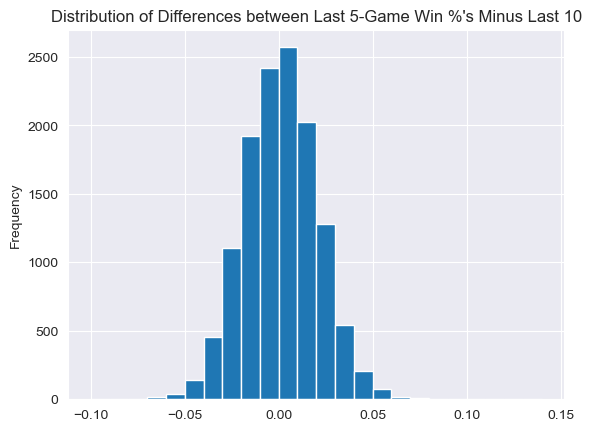

In [235]:
# Plotting the distributions of differences between last 5 game win % and last 10 game win %

(df_agg["LastFiveWinPerc"] - df_agg["LastTenWinPerc"])\
.plot(kind="hist", bins=np.arange(-.1, .15, .01), \
      title="Distribution of Differences between Last 5-Game Win %'s Minus Last 10");

In [236]:
# Assigning Pt Estimates for win percentage

# Mean and Standard Deviation for the difference between last 5 and 10 game win %
win_mean, win_std = (df_agg["LastFiveWinPerc"] - df_agg["LastTenWinPerc"]).agg(["mean", "std"])

# Sanity check
print(win_mean, win_std)
(df_agg["LastFiveWinPerc"] - df_agg["LastTenWinPerc"]).agg(["mean", "std"])

0.0012244232669153623 0.01975198929038947


mean    0.001224
std     0.019752
dtype: float64

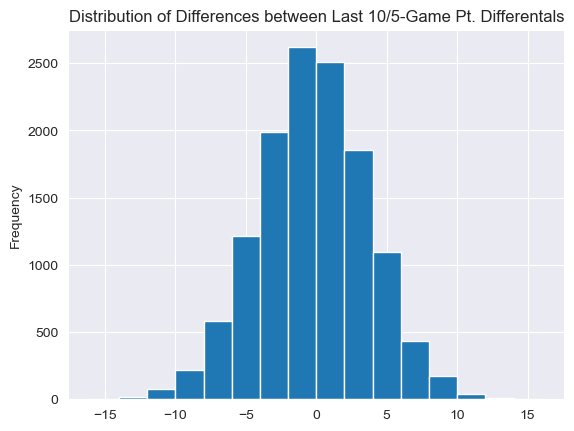

In [237]:
# Plotting the distributions of differences between last 5 game pt differential and last 10 game pt differential

(df_agg["LastFivePtDiff"] - df_agg["LastTenPtDiff"])\
.plot(kind="hist", bins=np.arange(-16, 18, 2),\
      title="Distribution of Differences between Last 10/5-Game Pt. Differentals");

In [238]:
# Assigning point estimates for pt differential
points_mean, points_std = (df_agg["LastFivePtDiff"] - df_agg["LastTenPtDiff"]).agg(["mean", "std"])

In [188]:
# Sanity Check
print(points_mean, points_std)
(df_agg["LastFivePtDiff"] - df_agg["LastTenPtDiff"]).agg(["mean", "std"])

-0.2811040174400498 3.901224798491914


mean   -0.281104
std     3.901225
dtype: float64

### Adding the revised "Trend" features

In [240]:
# Initialize Trend Feature
df_agg["Relative_Diff_Trend"] = 0

# Uptrends are greater than 1 standard deviation higher for the distribution
df_agg.loc[df_agg["LastFivePtDiff"] - df_agg["LastTenPtDiff"] >= \
                  points_std, "Relative_Diff_Trend"] = "Trending Up"
           
# Downtrends are less than 1 standard deviation lower
df_agg.loc[df_agg["LastFivePtDiff"] - df_agg["LastTenPtDiff"] <= \
                  -points_std, "Relative_Diff_Trend"] = "Trending Down"

# All others are "On Trend"
df_agg["Relative_Diff_Trend"].replace({0:"On Trend"}, inplace=True)

In [269]:
# Checking proportions of categories for pt diff trends

df_agg["Relative_Diff_Trend"].value_counts(normalize=True)

Relative_Diff_Trend
On Trend         0.691530
Trending Down    0.170724
Trending Up      0.137746
Name: proportion, dtype: float64

In [242]:
# Same thing for Win Percentage

# Initialize Trend Feature
df_agg["Relative_Win_Trend"] = 0

# Uptrends are greater than 1 standard deviation higher for the distribution
df_agg.loc[df_agg["LastFiveWinPerc"] - df_agg["LastTenWinPerc"] >= \
                  win_std, "Relative_Win_Trend"] = "Trending Up"
           
# Downtrends are less than 1 standard deviation lower
df_agg.loc[df_agg["LastFiveWinPerc"] - df_agg["LastTenWinPerc"] <= \
                  -win_std, "Relative_Win_Trend"] = "Trending Down"

# All others are "On Trend"
df_agg["Relative_Win_Trend"].replace({0:"On Trend"}, inplace=True)

In [270]:
# Checking proportions for pt diff trends, should similar to above

df_agg["Relative_Win_Trend"].value_counts(normalize=True)

Relative_Win_Trend
On Trend         0.690908
Trending Up      0.169169
Trending Down    0.139924
Name: proportion, dtype: float64

### Close Game Win % Distribution - Still Normal, but Patchy

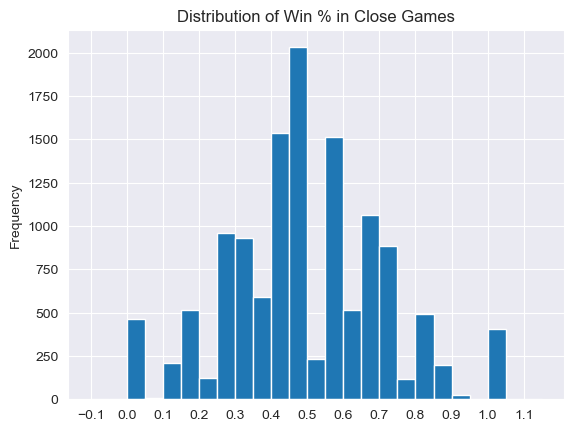

In [263]:
# Plotting the distribution of teams' records in close games, more or less normally distributed

df_agg["close_game_win_perc"].plot(kind="hist", bins=np.arange(-.1, 1.2, 0.05), \
                                   title="Distribution of Win % in Close Games", xticks=np.arange(-.1, 1.2, 0.1));

In [265]:
# Create a file for easier start point
df_agg.to_csv(os.path.join(path, "Aggregated_Season_Data.csv"))

<hr style="border: 4px solid blue"/>

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Tournament Results:</b> 
    
Combining the Aggregated Data with Tournament Games
</div>

I will assign labels for training by using data from the NCAA compact results dataframe. The "detailed" tournament results might be interesting for conducting post-hoc analysis and determining which teams underperformed or exceeded expectations. I will also randomize the sequence of columns so that it is arranged in a "Team_A", "Team_B" fashion and determine labels based on if "Team_A" wins. 

In [273]:
# Inspecting the compact NCAA Tournament historical data
ncaa_compact

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,League
0,1985,136,1116,63,1234,54,N,0,Men
1,1985,136,1120,59,1345,58,N,0,Men
2,1985,136,1207,68,1250,43,N,0,Men
3,1985,136,1229,58,1425,55,N,0,Men
4,1985,136,1242,49,1325,38,N,0,Men
...,...,...,...,...,...,...,...,...,...
1578,2023,147,3376,86,3268,75,H,0,Women
1579,2023,147,3439,84,3326,74,N,0,Women
1580,2023,151,3234,77,3376,73,N,0,Women
1581,2023,151,3261,79,3439,72,N,0,Women


### Merging NCAA Historical Data

In [298]:
# Adding the winning team's data to the historical compact NCAA data

# New df object "merged" 
merged = ncaa_compact[[ "League", "DayNum", "Season", "WTeamID", "WLoc", "WScore"]]\
    .merge(df_agg, left_on=["Season", "WTeamID"], right_on=["Season", "TeamID"], how="left").drop(columns="TeamID")

# Adding a prefix temporarily to allow for future renaming of columns and team data horizontal positioning
merged.rename(columns={x: "W" + x for x in merge_trial.columns[6:]}, inplace=True)

# Inspection
merged.head()

,League,DayNum,Season,WTeamID,WLoc,WScore,WAvgTeamScore,WStdDevTeamScore,WAvgOppScore,WStdDevOppScore,WAvgFGMade,WAvgFGAtt,WTotalFGMade,WTotalFGAtt,WAvg3ptMade,WAvg3ptAtt,WTotal3ptMade,WTotal3ptAtt,WAvg_FT_Made,WAvg_FT_Att,WTotal_FT_Made,WTotal_FT_Att,WAvg_Off_Rebs,WTotal_Off_Rebs,WAvg_Def_Rebs,WTotal_Def_Rebs,WAvg_Assts,WTotal_Assts,WAvg_TO,WTotal_TO,WAvg_Steals,WAvg_Blocks,WAvg_Fouls,WOppAvgFGMade,WOppAvgFGAtt,WOppTotalFGMade,WOppTotalFGAtt,WOppAvg3ptMade,WOppAvg3ptAtt,WOppTotal3ptMade,WOppTotal3ptAtt,WOppAvg_FT_Made,WOppAvg_FT_Att,WOppTotal_FT_Made,WOppTotal_FT_Att,WOppAvg_Off_Rebs,WOppTotal_Off_Rebs,WOppAvg_Def_Rebs,WOppTotal_Def_Rebs,WOppAvg_Assts,WOppTotal_Assts,WOppAvg_TO,WOppTotal_TO,WOppAvg_Steals,WOppAvg_Blocks,WOppAvg_Fouls,WAvgPtDiff,WMedPtDiff,WStdPtDiff,WWin_Total,WLoss_Total,WHomeWins,WHomeLoss,WRoadWins,WRoadLoss,WNeutralWins,WNeutralLoss,WOTWins,WOTLoss,WCloseGames,WCloseWins,WMaxWStreak,WMaxLStreak,WLastTenWinPerc,WLastFiveWinPerc,WWinTrend,WLastTenPtDiff,WLastFivePtDiff,WDiffTrend,WConference,WCoach,WMedianRanking,WBestRanking,WWorstRanking,WChalk_Seed,WSeed,Wwin_perc,Whome_win_perc,Wroad_win_perc,Wneutral_win_perc,Wot_win_perc,Wclose_game_win_perc,WRelative_Diff_Trend,WRelative_Win_Trend
0,Men,136,1985,1116,N,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Men,136,1985,1120,N,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Men,136,1985,1207,N,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Men,136,1985,1229,N,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Men,136,1985,1242,N,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
# Doing the same operation for teams listed as the losing team

# New df object "loser_merged"
loser_merged = ncaa_compact[["Season", "LTeamID", "LScore"]]\
.merge(df_agg, left_on=["Season", "LTeamID"], right_on=["Season", "TeamID"], how="left").drop(columns="TeamID")

# Same column prefix added
loser_merged.rename(columns={x: "L" + x for x in merge_trial.columns[3:]}, inplace=True)

# Inspection
print(loser_merged.shape) 
loser_merged.head(2)

(4034, 91)


,Season,LTeamID,LScore,LAvgTeamScore,LStdDevTeamScore,LAvgOppScore,LStdDevOppScore,LAvgFGMade,LAvgFGAtt,LTotalFGMade,LTotalFGAtt,LAvg3ptMade,LAvg3ptAtt,LTotal3ptMade,LTotal3ptAtt,LAvg_FT_Made,LAvg_FT_Att,LTotal_FT_Made,LTotal_FT_Att,LAvg_Off_Rebs,LTotal_Off_Rebs,LAvg_Def_Rebs,LTotal_Def_Rebs,LAvg_Assts,LTotal_Assts,LAvg_TO,LTotal_TO,LAvg_Steals,LAvg_Blocks,LAvg_Fouls,LOppAvgFGMade,LOppAvgFGAtt,LOppTotalFGMade,LOppTotalFGAtt,LOppAvg3ptMade,LOppAvg3ptAtt,LOppTotal3ptMade,LOppTotal3ptAtt,LOppAvg_FT_Made,LOppAvg_FT_Att,LOppTotal_FT_Made,LOppTotal_FT_Att,LOppAvg_Off_Rebs,LOppTotal_Off_Rebs,LOppAvg_Def_Rebs,LOppTotal_Def_Rebs,LOppAvg_Assts,LOppTotal_Assts,LOppAvg_TO,LOppTotal_TO,LOppAvg_Steals,LOppAvg_Blocks,LOppAvg_Fouls,LAvgPtDiff,LMedPtDiff,LStdPtDiff,LWin_Total,LLoss_Total,LHomeWins,LHomeLoss,LRoadWins,LRoadLoss,LNeutralWins,LNeutralLoss,LOTWins,LOTLoss,LCloseGames,LCloseWins,LMaxWStreak,LMaxLStreak,LLastTenWinPerc,LLastFiveWinPerc,LWinTrend,LLastTenPtDiff,LLastFivePtDiff,LDiffTrend,LConference,LCoach,LMedianRanking,LBestRanking,LWorstRanking,LChalk_Seed,LSeed,Lwin_perc,Lhome_win_perc,Lroad_win_perc,Lneutral_win_perc,Lot_win_perc,Lclose_game_win_perc,LRelative_Diff_Trend,LRelative_Win_Trend
0,1985,1234,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985,1345,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
# Concatenate the data so that winning team data is on the left and losing team data is on the right
concat_df = pd.concat([merged, loser_merged.drop(columns="Season")], axis=1)

# Inspection
concat_df.head()

,League,DayNum,Season,WTeamID,WLoc,WScore,WAvgTeamScore,WStdDevTeamScore,WAvgOppScore,WStdDevOppScore,WAvgFGMade,WAvgFGAtt,WTotalFGMade,WTotalFGAtt,WAvg3ptMade,WAvg3ptAtt,WTotal3ptMade,WTotal3ptAtt,WAvg_FT_Made,WAvg_FT_Att,WTotal_FT_Made,WTotal_FT_Att,WAvg_Off_Rebs,WTotal_Off_Rebs,WAvg_Def_Rebs,WTotal_Def_Rebs,WAvg_Assts,WTotal_Assts,WAvg_TO,WTotal_TO,WAvg_Steals,WAvg_Blocks,WAvg_Fouls,WOppAvgFGMade,WOppAvgFGAtt,WOppTotalFGMade,WOppTotalFGAtt,WOppAvg3ptMade,WOppAvg3ptAtt,WOppTotal3ptMade,WOppTotal3ptAtt,WOppAvg_FT_Made,WOppAvg_FT_Att,WOppTotal_FT_Made,WOppTotal_FT_Att,WOppAvg_Off_Rebs,WOppTotal_Off_Rebs,WOppAvg_Def_Rebs,WOppTotal_Def_Rebs,WOppAvg_Assts,WOppTotal_Assts,WOppAvg_TO,WOppTotal_TO,WOppAvg_Steals,WOppAvg_Blocks,WOppAvg_Fouls,WAvgPtDiff,WMedPtDiff,WStdPtDiff,WWin_Total,WLoss_Total,WHomeWins,WHomeLoss,WRoadWins,WRoadLoss,WNeutralWins,WNeutralLoss,WOTWins,WOTLoss,WCloseGames,WCloseWins,WMaxWStreak,WMaxLStreak,WLastTenWinPerc,WLastFiveWinPerc,WWinTrend,WLastTenPtDiff,WLastFivePtDiff,WDiffTrend,WConference,WCoach,WMedianRanking,WBestRanking,WWorstRanking,WChalk_Seed,WSeed,Wwin_perc,Whome_win_perc,Wroad_win_perc,Wneutral_win_perc,Wot_win_perc,Wclose_game_win_perc,WRelative_Diff_Trend,WRelative_Win_Trend,LTeamID,LScore,LAvgTeamScore,LStdDevTeamScore,LAvgOppScore,LStdDevOppScore,LAvgFGMade,LAvgFGAtt,LTotalFGMade,LTotalFGAtt,LAvg3ptMade,LAvg3ptAtt,LTotal3ptMade,LTotal3ptAtt,LAvg_FT_Made,LAvg_FT_Att,LTotal_FT_Made,LTotal_FT_Att,LAvg_Off_Rebs,LTotal_Off_Rebs,LAvg_Def_Rebs,LTotal_Def_Rebs,LAvg_Assts,LTotal_Assts,LAvg_TO,LTotal_TO,LAvg_Steals,LAvg_Blocks,LAvg_Fouls,LOppAvgFGMade,LOppAvgFGAtt,LOppTotalFGMade,LOppTotalFGAtt,LOppAvg3ptMade,LOppAvg3ptAtt,LOppTotal3ptMade,LOppTotal3ptAtt,LOppAvg_FT_Made,LOppAvg_FT_Att,LOppTotal_FT_Made,LOppTotal_FT_Att,LOppAvg_Off_Rebs,LOppTotal_Off_Rebs,LOppAvg_Def_Rebs,LOppTotal_Def_Rebs,LOppAvg_Assts,LOppTotal_Assts,LOppAvg_TO,LOppTotal_TO,LOppAvg_Steals,LOppAvg_Blocks,LOppAvg_Fouls,LAvgPtDiff,LMedPtDiff,LStdPtDiff,LWin_Total,LLoss_Total,LHomeWins,LHomeLoss,LRoadWins,LRoadLoss,LNeutralWins,LNeutralLoss,LOTWins,LOTLoss,LCloseGames,LCloseWins,LMaxWStreak,LMaxLStreak,LLastTenWinPerc,LLastFiveWinPerc,LWinTrend,LLastTenPtDiff,LLastFivePtDiff,LDiffTrend,LConference,LCoach,LMedianRanking,LBestRanking,LWorstRanking,LChalk_Seed,LSeed,Lwin_perc,Lhome_win_perc,Lroad_win_perc,Lneutral_win_perc,Lot_win_perc,Lclose_game_win_perc,LRelative_Diff_Trend,LRelative_Win_Trend
0,Men,136,1985,1116,N,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1234,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Men,136,1985,1120,N,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1345,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Men,136,1985,1207,N,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [339]:
# Column renaming to allow for flipping of Team_A/B orientation

# Rename W, L to more anonymous Team_A, Team_B 
concat_df.columns = [x.replace('W', 'Team_A_', 1) if x[0] == 'W' else x for x in concat_df.columns]
concat_df.columns = [x.replace('L', 'Team_B_', 1) if x[0] == 'L' else x for x in concat_df.columns]
concat_df.rename(columns={"Team_B_eague":"League"}, inplace=True)

# Inspection
concat_df.head()

,League,DayNum,Season,Team_A_TeamID,Team_A_Loc,Team_A_Score,Team_A_AvgTeamScore,Team_A_StdDevTeamScore,Team_A_AvgOppScore,Team_A_StdDevOppScore,Team_A_AvgFGMade,Team_A_AvgFGAtt,Team_A_TotalFGMade,Team_A_TotalFGAtt,Team_A_Avg3ptMade,Team_A_Avg3ptAtt,Team_A_Total3ptMade,Team_A_Total3ptAtt,Team_A_Avg_FT_Made,Team_A_Avg_FT_Att,Team_A_Total_FT_Made,Team_A_Total_FT_Att,Team_A_Avg_Off_Rebs,Team_A_Total_Off_Rebs,Team_A_Avg_Def_Rebs,Team_A_Total_Def_Rebs,Team_A_Avg_Assts,Team_A_Total_Assts,Team_A_Avg_TO,Team_A_Total_TO,Team_A_Avg_Steals,Team_A_Avg_Blocks,Team_A_Avg_Fouls,Team_A_OppAvgFGMade,Team_A_OppAvgFGAtt,Team_A_OppTotalFGMade,Team_A_OppTotalFGAtt,Team_A_OppAvg3ptMade,Team_A_OppAvg3ptAtt,Team_A_OppTotal3ptMade,Team_A_OppTotal3ptAtt,Team_A_OppAvg_FT_Made,Team_A_OppAvg_FT_Att,Team_A_OppTotal_FT_Made,Team_A_OppTotal_FT_Att,Team_A_OppAvg_Off_Rebs,Team_A_OppTotal_Off_Rebs,Team_A_OppAvg_Def_Rebs,Team_A_OppTotal_Def_Rebs,Team_A_OppAvg_Assts,Team_A_OppTotal_Assts,Team_A_OppAvg_TO,Team_A_OppTotal_TO,Team_A_OppAvg_Steals,Team_A_OppAvg_Blocks,Team_A_OppAvg_Fouls,Team_A_AvgPtDiff,Team_A_MedPtDiff,Team_A_StdPtDiff,Team_A_Win_Total,Team_A_Loss_Total,Team_A_HomeWins,Team_A_HomeLoss,Team_A_RoadWins,Team_A_RoadLoss,Team_A_NeutralWins,Team_A_NeutralLoss,Team_A_OTWins,Team_A_OTLoss,Team_A_CloseGames,Team_A_CloseWins,Team_A_MaxWStreak,Team_A_MaxLStreak,Team_A_LastTenWinPerc,Team_A_LastFiveWinPerc,Team_A_WinTrend,Team_A_LastTenPtDiff,Team_A_LastFivePtDiff,Team_A_DiffTrend,Team_A_Conference,Team_A_Coach,Team_A_MedianRanking,Team_A_BestRanking,Team_A_WorstRanking,Team_A_Chalk_Seed,Team_A_Seed,Team_A_win_perc,Team_A_home_win_perc,Team_A_road_win_perc,Team_A_neutral_win_perc,Team_A_ot_win_perc,Team_A_close_game_win_perc,Team_A_Relative_Diff_Trend,Team_A_Relative_Win_Trend,Team_B_TeamID,Team_B_Score,Team_B_AvgTeamScore,Team_B_StdDevTeamScore,Team_B_AvgOppScore,Team_B_StdDevOppScore,Team_B_AvgFGMade,Team_B_AvgFGAtt,Team_B_TotalFGMade,Team_B_TotalFGAtt,Team_B_Avg3ptMade,Team_B_Avg3ptAtt,Team_B_Total3ptMade,Team_B_Total3ptAtt,Team_B_Avg_FT_Made,Team_B_Avg_FT_Att,Team_B_Total_FT_Made,Team_B_Total_FT_Att,Team_B_Avg_Off_Rebs,Team_B_Total_Off_Rebs,Team_B_Avg_Def_Rebs,Team_B_Total_Def_Rebs,Team_B_Avg_Assts,Team_B_Total_Assts,Team_B_Avg_TO,Team_B_Total_TO,Team_B_Avg_Steals,Team_B_Avg_Blocks,Team_B_Avg_Fouls,Team_B_OppAvgFGMade,Team_B_OppAvgFGAtt,Team_B_OppTotalFGMade,Team_B_OppTotalFGAtt,Team_B_OppAvg3ptMade,Team_B_OppAvg3ptAtt,Team_B_OppTotal3ptMade,Team_B_OppTotal3ptAtt,Team_B_OppAvg_FT_Made,Team_B_OppAvg_FT_Att,Team_B_OppTotal_FT_Made,Team_B_OppTotal_FT_Att,Team_B_OppAvg_Off_Rebs,Team_B_OppTotal_Off_Rebs,Team_B_OppAvg_Def_Rebs,Team_B_OppTotal_Def_Rebs,Team_B_OppAvg_Assts,Team_B_OppTotal_Assts,Team_B_OppAvg_TO,Team_B_OppTotal_TO,Team_B_OppAvg_Steals,Team_B_OppAvg_Blocks,Team_B_OppAvg_Fouls,Team_B_AvgPtDiff,Team_B_MedPtDiff,Team_B_StdPtDiff,Team_B_Win_Total,Team_B_Loss_Total,Team_B_HomeWins,Team_B_HomeLoss,Team_B_RoadWins,Team_B_RoadLoss,Team_B_NeutralWins,Team_B_NeutralLoss,Team_B_OTWins,Team_B_OTLoss,Team_B_CloseGames,Team_B_CloseWins,Team_B_MaxWStreak,Team_B_MaxLStreak,Team_B_LastTenWinPerc,Team_B_LastFiveWinPerc,Team_B_WinTrend,Team_B_LastTenPtDiff,Team_B_LastFivePtDiff,Team_B_DiffTrend,Team_B_Conference,Team_B_Coach,Team_B_MedianRanking,Team_B_BestRanking,Team_B_WorstRanking,Team_B_Chalk_Seed,Team_B_Seed,Team_B_win_perc,Team_B_home_win_perc,Team_B_road_win_perc,Team_B_neutral_win_perc,Team_B_ot_win_perc,Team_B_close_game_win_perc,Team_B_Relative_Diff_Trend,Team_B_Relative_Win_Trend
0,Men,136,1985,1116,N,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1234,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

##### Adding Team_B location, filtering for Seasons >= 2003

In [348]:
# Filtering by Season
filtered_df = concat_df.loc[concat_df["Season"] >= 2003].copy()

# Creating Team_B_Loc
filtered_df["Team_B_Loc"] = filtered_df["Team_A_Loc"].map({"N":"N", "H":"A", "A":"H"})

# Checking the df
filtered_df.shape
filtered_df.head()

,League,DayNum,Season,Team_A_TeamID,Team_A_Loc,Team_A_Score,Team_A_AvgTeamScore,Team_A_StdDevTeamScore,Team_A_AvgOppScore,Team_A_StdDevOppScore,Team_A_AvgFGMade,Team_A_AvgFGAtt,Team_A_TotalFGMade,Team_A_TotalFGAtt,Team_A_Avg3ptMade,Team_A_Avg3ptAtt,Team_A_Total3ptMade,Team_A_Total3ptAtt,Team_A_Avg_FT_Made,Team_A_Avg_FT_Att,Team_A_Total_FT_Made,Team_A_Total_FT_Att,Team_A_Avg_Off_Rebs,Team_A_Total_Off_Rebs,Team_A_Avg_Def_Rebs,Team_A_Total_Def_Rebs,Team_A_Avg_Assts,Team_A_Total_Assts,Team_A_Avg_TO,Team_A_Total_TO,Team_A_Avg_Steals,Team_A_Avg_Blocks,Team_A_Avg_Fouls,Team_A_OppAvgFGMade,Team_A_OppAvgFGAtt,Team_A_OppTotalFGMade,Team_A_OppTotalFGAtt,Team_A_OppAvg3ptMade,Team_A_OppAvg3ptAtt,Team_A_OppTotal3ptMade,Team_A_OppTotal3ptAtt,Team_A_OppAvg_FT_Made,Team_A_OppAvg_FT_Att,Team_A_OppTotal_FT_Made,Team_A_OppTotal_FT_Att,Team_A_OppAvg_Off_Rebs,Team_A_OppTotal_Off_Rebs,Team_A_OppAvg_Def_Rebs,Team_A_OppTotal_Def_Rebs,Team_A_OppAvg_Assts,Team_A_OppTotal_Assts,Team_A_OppAvg_TO,Team_A_OppTotal_TO,Team_A_OppAvg_Steals,Team_A_OppAvg_Blocks,Team_A_OppAvg_Fouls,Team_A_AvgPtDiff,Team_A_MedPtDiff,Team_A_StdPtDiff,Team_A_Win_Total,Team_A_Loss_Total,Team_A_HomeWins,Team_A_HomeLoss,Team_A_RoadWins,Team_A_RoadLoss,Team_A_NeutralWins,Team_A_NeutralLoss,Team_A_OTWins,Team_A_OTLoss,Team_A_CloseGames,Team_A_CloseWins,Team_A_MaxWStreak,Team_A_MaxLStreak,Team_A_LastTenWinPerc,Team_A_LastFiveWinPerc,Team_A_WinTrend,Team_A_LastTenPtDiff,Team_A_LastFivePtDiff,Team_A_DiffTrend,Team_A_Conference,Team_A_Coach,Team_A_MedianRanking,Team_A_BestRanking,Team_A_WorstRanking,Team_A_Chalk_Seed,Team_A_Seed,Team_A_win_perc,Team_A_home_win_perc,Team_A_road_win_perc,Team_A_neutral_win_perc,Team_A_ot_win_perc,Team_A_close_game_win_perc,Team_A_Relative_Diff_Trend,Team_A_Relative_Win_Trend,Team_B_TeamID,Team_B_Score,Team_B_AvgTeamScore,Team_B_StdDevTeamScore,Team_B_AvgOppScore,Team_B_StdDevOppScore,Team_B_AvgFGMade,Team_B_AvgFGAtt,Team_B_TotalFGMade,Team_B_TotalFGAtt,Team_B_Avg3ptMade,Team_B_Avg3ptAtt,Team_B_Total3ptMade,Team_B_Total3ptAtt,Team_B_Avg_FT_Made,Team_B_Avg_FT_Att,Team_B_Total_FT_Made,Team_B_Total_FT_Att,Team_B_Avg_Off_Rebs,Team_B_Total_Off_Rebs,Team_B_Avg_Def_Rebs,Team_B_Total_Def_Rebs,Team_B_Avg_Assts,Team_B_Total_Assts,Team_B_Avg_TO,Team_B_Total_TO,Team_B_Avg_Steals,Team_B_Avg_Blocks,Team_B_Avg_Fouls,Team_B_OppAvgFGMade,Team_B_OppAvgFGAtt,Team_B_OppTotalFGMade,Team_B_OppTotalFGAtt,Team_B_OppAvg3ptMade,Team_B_OppAvg3ptAtt,Team_B_OppTotal3ptMade,Team_B_OppTotal3ptAtt,Team_B_OppAvg_FT_Made,Team_B_OppAvg_FT_Att,Team_B_OppTotal_FT_Made,Team_B_OppTotal_FT_Att,Team_B_OppAvg_Off_Rebs,Team_B_OppTotal_Off_Rebs,Team_B_OppAvg_Def_Rebs,Team_B_OppTotal_Def_Rebs,Team_B_OppAvg_Assts,Team_B_OppTotal_Assts,Team_B_OppAvg_TO,Team_B_OppTotal_TO,Team_B_OppAvg_Steals,Team_B_OppAvg_Blocks,Team_B_OppAvg_Fouls,Team_B_AvgPtDiff,Team_B_MedPtDiff,Team_B_StdPtDiff,Team_B_Win_Total,Team_B_Loss_Total,Team_B_HomeWins,Team_B_HomeLoss,Team_B_RoadWins,Team_B_RoadLoss,Team_B_NeutralWins,Team_B_NeutralLoss,Team_B_OTWins,Team_B_OTLoss,Team_B_CloseGames,Team_B_CloseWins,Team_B_MaxWStreak,Team_B_MaxLStreak,Team_B_LastTenWinPerc,Team_B_LastFiveWinPerc,Team_B_WinTrend,Team_B_LastTenPtDiff,Team_B_LastFivePtDiff,Team_B_DiffTrend,Team_B_Conference,Team_B_Coach,Team_B_MedianRanking,Team_B_BestRanking,Team_B_WorstRanking,Team_B_Chalk_Seed,Team_B_Seed,Team_B_win_perc,Team_B_home_win_perc,Team_B_road_win_perc,Team_B_neutral_win_perc,Team_B_ot_win_perc,Team_B_close_game_win_perc,Team_B_Relative_Diff_Trend,Team_B_Relative_Win_Trend,Team_B_Loc
1136,Men,134,2003,1421,N,92,71.206897,11.638542,78.448276,13.064637,24.379310,56.793103,707.0,1647.0,6.482759,18.000000,188.0,522.0,15.965517,20.931034,463.0,607.0,12.275862,356.0,23.172414,672.0,13.034483,378.0,16.206897,470.0,7.068966,3.000000,19.103448,27.793103,60.965517,806.0,1768.0,7.620690,20.758621,221.0,602.0,15.241379,22.551724,442.0,654.0,13.724138,398.0,22.827586,662.0,15.862069,460.0,12.827586,372.0,8.827586,4.241379,18.689655,-7.241379,-3.0,17.508478,13.0,16

### Re-ordering/flipping data within rows

In [31]:
# Save/Load File 

# Save File
# filtered_df.to_csv(os.path.join(path, "Filtered_NCAA_Tourney_Data_2003.csv"))

# Re-Load / Inspect
filtered_df = pd.read_csv(os.path.join(path, "Filtered_NCAA_Tourney_Data_2003.csv"), index_col=0)
print(filtered_df.shape)
filtered_df.head()

(2583, 185)


,League,DayNum,Season,Team_A_TeamID,Team_A_Loc,Team_A_Score,Team_A_AvgTeamScore,Team_A_StdDevTeamScore,Team_A_AvgOppScore,Team_A_StdDevOppScore,Team_A_AvgFGMade,Team_A_AvgFGAtt,Team_A_TotalFGMade,Team_A_TotalFGAtt,Team_A_Avg3ptMade,Team_A_Avg3ptAtt,Team_A_Total3ptMade,Team_A_Total3ptAtt,Team_A_Avg_FT_Made,Team_A_Avg_FT_Att,Team_A_Total_FT_Made,Team_A_Total_FT_Att,Team_A_Avg_Off_Rebs,Team_A_Total_Off_Rebs,Team_A_Avg_Def_Rebs,Team_A_Total_Def_Rebs,Team_A_Avg_Assts,Team_A_Total_Assts,Team_A_Avg_TO,Team_A_Total_TO,Team_A_Avg_Steals,Team_A_Avg_Blocks,Team_A_Avg_Fouls,Team_A_OppAvgFGMade,Team_A_OppAvgFGAtt,Team_A_OppTotalFGMade,Team_A_OppTotalFGAtt,Team_A_OppAvg3ptMade,Team_A_OppAvg3ptAtt,Team_A_OppTotal3ptMade,Team_A_OppTotal3ptAtt,Team_A_OppAvg_FT_Made,Team_A_OppAvg_FT_Att,Team_A_OppTotal_FT_Made,Team_A_OppTotal_FT_Att,Team_A_OppAvg_Off_Rebs,Team_A_OppTotal_Off_Rebs,Team_A_OppAvg_Def_Rebs,Team_A_OppTotal_Def_Rebs,Team_A_OppAvg_Assts,Team_A_OppTotal_Assts,Team_A_OppAvg_TO,Team_A_OppTotal_TO,Team_A_OppAvg_Steals,Team_A_OppAvg_Blocks,Team_A_OppAvg_Fouls,Team_A_AvgPtDiff,Team_A_MedPtDiff,Team_A_StdPtDiff,Team_A_Win_Total,Team_A_Loss_Total,Team_A_HomeWins,Team_A_HomeLoss,Team_A_RoadWins,Team_A_RoadLoss,Team_A_NeutralWins,Team_A_NeutralLoss,Team_A_OTWins,Team_A_OTLoss,Team_A_CloseGames,Team_A_CloseWins,Team_A_MaxWStreak,Team_A_MaxLStreak,Team_A_LastTenWinPerc,Team_A_LastFiveWinPerc,Team_A_WinTrend,Team_A_LastTenPtDiff,Team_A_LastFivePtDiff,Team_A_DiffTrend,Team_A_Conference,Team_A_Coach,Team_A_MedianRanking,Team_A_BestRanking,Team_A_WorstRanking,Team_A_Chalk_Seed,Team_A_Seed,Team_A_win_perc,Team_A_home_win_perc,Team_A_road_win_perc,Team_A_neutral_win_perc,Team_A_ot_win_perc,Team_A_close_game_win_perc,Team_A_Relative_Diff_Trend,Team_A_Relative_Win_Trend,Team_B_TeamID,Team_B_Score,Team_B_AvgTeamScore,Team_B_StdDevTeamScore,Team_B_AvgOppScore,Team_B_StdDevOppScore,Team_B_AvgFGMade,Team_B_AvgFGAtt,Team_B_TotalFGMade,Team_B_TotalFGAtt,Team_B_Avg3ptMade,Team_B_Avg3ptAtt,Team_B_Total3ptMade,Team_B_Total3ptAtt,Team_B_Avg_FT_Made,Team_B_Avg_FT_Att,Team_B_Total_FT_Made,Team_B_Total_FT_Att,Team_B_Avg_Off_Rebs,Team_B_Total_Off_Rebs,Team_B_Avg_Def_Rebs,Team_B_Total_Def_Rebs,Team_B_Avg_Assts,Team_B_Total_Assts,Team_B_Avg_TO,Team_B_Total_TO,Team_B_Avg_Steals,Team_B_Avg_Blocks,Team_B_Avg_Fouls,Team_B_OppAvgFGMade,Team_B_OppAvgFGAtt,Team_B_OppTotalFGMade,Team_B_OppTotalFGAtt,Team_B_OppAvg3ptMade,Team_B_OppAvg3ptAtt,Team_B_OppTotal3ptMade,Team_B_OppTotal3ptAtt,Team_B_OppAvg_FT_Made,Team_B_OppAvg_FT_Att,Team_B_OppTotal_FT_Made,Team_B_OppTotal_FT_Att,Team_B_OppAvg_Off_Rebs,Team_B_OppTotal_Off_Rebs,Team_B_OppAvg_Def_Rebs,Team_B_OppTotal_Def_Rebs,Team_B_OppAvg_Assts,Team_B_OppTotal_Assts,Team_B_OppAvg_TO,Team_B_OppTotal_TO,Team_B_OppAvg_Steals,Team_B_OppAvg_Blocks,Team_B_OppAvg_Fouls,Team_B_AvgPtDiff,Team_B_MedPtDiff,Team_B_StdPtDiff,Team_B_Win_Total,Team_B_Loss_Total,Team_B_HomeWins,Team_B_HomeLoss,Team_B_RoadWins,Team_B_RoadLoss,Team_B_NeutralWins,Team_B_NeutralLoss,Team_B_OTWins,Team_B_OTLoss,Team_B_CloseGames,Team_B_CloseWins,Team_B_MaxWStreak,Team_B_MaxLStreak,Team_B_LastTenWinPerc,Team_B_LastFiveWinPerc,Team_B_WinTrend,Team_B_LastTenPtDiff,Team_B_LastFivePtDiff,Team_B_DiffTrend,Team_B_Conference,Team_B_Coach,Team_B_MedianRanking,Team_B_BestRanking,Team_B_WorstRanking,Team_B_Chalk_Seed,Team_B_Seed,Team_B_win_perc,Team_B_home_win_perc,Team_B_road_win_perc,Team_B_neutral_win_perc,Team_B_ot_win_perc,Team_B_close_game_win_perc,Team_B_Relative_Diff_Trend,Team_B_Relative_Win_Trend,Team_B_Loc
1136,Men,134,2003,1421,N,92,71.206897,11.638542,78.448276,13.064637,24.379310,56.793103,707.0,1647.0,6.482759,18.000000,188.0,522.0,15.965517,20.931034,463.0,607.0,12.275862,356.0,23.172414,672.0,13.034483,378.0,16.206897,470.0,7.068966,3.000000,19.103448,27.793103,60.965517,806.0,1768.0,7.620690,20.758621,221.0,602.0,15.241379,22.551724,442.0,654.0,13.724138,398.0,22.827586,662.0,15.862069,460.0,12.827586,372.0,8.827586,4.241379,18.689655,-7.241379,-3.0,17.508478,13.0,16

In [32]:
pd.set_option("display.max_columns", None)

In [34]:
# Choose half the rows to flip at random

# Set seed for reproduceability
np.random.seed(13)

# Select 50% of row indices for flipping, replace = False to avoid duplicate indices 
flip = np.random.choice(filtered_df.index, int(filtered_df.shape[0] / 2), replace=False)

# Flip Team_A, B columnss
for col in filtered_df.columns:
    if col[0:7] == 'Team_A_':
        filtered_df.loc[flip, col], filtered_df.loc[flip, col.replace('Team_A_', 'Team_B_')] = \
        filtered_df.loc[flip, col.replace('Team_A_', 'Team_B_')].values, filtered_df.loc[flip, col].values

# Re-order columns alphabetically
filtered_df = filtered_df.reindex(sorted(filtered_df.columns), axis=1)

# check
filtered_df.head(10)

,DayNum,League,Season,Team_A_Avg3ptAtt,Team_A_Avg3ptMade,Team_A_AvgFGAtt,Team_A_AvgFGMade,Team_A_AvgOppScore,Team_A_AvgPtDiff,Team_A_AvgTeamScore,Team_A_Avg_Assts,Team_A_Avg_Blocks,Team_A_Avg_Def_Rebs,Team_A_Avg_FT_Att,Team_A_Avg_FT_Made,Team_A_Avg_Fouls,Team_A_Avg_Off_Rebs,Team_A_Avg_Steals,Team_A_Avg_TO,Team_A_BestRanking,Team_A_Chalk_Seed,Team_A_CloseGames,Team_A_CloseWins,Team_A_Coach,Team_A_Conference,Team_A_DiffTrend,Team_A_HomeLoss,Team_A_HomeWins,Team_A_LastFivePtDiff,Team_A_LastFiveWinPerc,Team_A_LastTenPtDiff,Team_A_LastTenWinPerc,Team_A_Loc,Team_A_Loss_Total,Team_A_MaxLStreak,Team_A_MaxWStreak,Team_A_MedPtDiff,Team_A_MedianRanking,Team_A_NeutralLoss,Team_A_NeutralWins,Team_A_OTLoss,Team_A_OTWins,Team_A_OppAvg3ptAtt,Team_A_OppAvg3ptMade,Team_A_OppAvgFGAtt,Team_A_OppAvgFGMade,Team_A_OppAvg_Assts,Team_A_OppAvg_Blocks,Team_A_OppAvg_Def_Rebs,Team_A_OppAvg_FT_Att,Team_A_OppAvg_FT_Made,Team_A_OppAvg_Fouls,Team_A_OppAvg_Off_Rebs,Team_A_OppAvg_Steals,Team_A_OppAvg_TO,Team_A_OppTotal3ptAtt,Team_A_OppTotal3ptMade,Team_A_OppTotalFGAtt,Team_A_OppTotalFGMade,Team_A_OppTotal_Assts,Team_A_OppTotal_Def_Rebs,Team_A_OppTotal_FT_Att,Team_A_OppTotal_FT_Made,Team_A_OppTotal_Off_Rebs,Team_A_OppTotal_TO,Team_A_Relative_Diff_Trend,Team_A_Relative_Win_Trend,Team_A_RoadLoss,Team_A_RoadWins,Team_A_Score,Team_A_Seed,Team_A_StdDevOppScore,Team_A_StdDevTeamScore,Team_A_StdPtDiff,Team_A_TeamID,Team_A_Total3ptAtt,Team_A_Total3ptMade,Team_A_TotalFGAtt,Team_A_TotalFGMade,Team_A_Total_Assts,Team_A_Total_Def_Rebs,Team_A_Total_FT_Att,Team_A_Total_FT_Made,Team_A_Total_Off_Rebs,Team_A_Total_TO,Team_A_WinTrend,Team_A_Win_Total,Team_A_WorstRanking,Team_A_close_game_win_perc,Team_A_home_win_perc,Team_A_neutral_win_perc,Team_A_ot_win_perc,Team_A_road_win_perc,Team_A_win_perc,Team_B_Avg3ptAtt,Team_B_Avg3ptMade,Team_B_AvgFGAtt,Team_B_AvgFGMade,Team_B_AvgOppScore,Team_B_AvgPtDiff,Team_B_AvgTeamScore,Team_B_Avg_Assts,Team_B_Avg_Blocks,Team_B_Avg_Def_Rebs,Team_B_Avg_FT_Att,Team_B_Avg_FT_Made,Team_B_Avg_Fouls,Team_B_Avg_Off_Rebs,Team_B_Avg_Steals,Team_B_Avg_TO,Team_B_BestRanking,Team_B_Chalk_Seed,Team_B_CloseGames,Team_B_CloseWins,Team_B_Coach,Team_B_Conference,Team_B_DiffTrend,Team_B_HomeLoss,Team_B_HomeWins,Team_B_LastFivePtDiff,Team_B_LastFiveWinPerc,Team_B_LastTenPtDiff,Team_B_LastTenWinPerc,Team_B_Loc,Team_B_Loss_Total,Team_B_MaxLStreak,Team_B_MaxWStreak,Team_B_MedPtDiff,Team_B_MedianRanking,Team_B_NeutralLoss,Team_B_NeutralWins,Team_B_OTLoss,Team_B_OTWins,Team_B_OppAvg3ptAtt,Team_B_OppAvg3ptMade,Team_B_OppAvgFGAtt,Team_B_OppAvgFGMade,Team_B_OppAvg_Assts,Team_B_OppAvg_Blocks,Team_B_OppAvg_Def_Rebs,Team_B_OppAvg_FT_Att,Team_B_OppAvg_FT_Made,Team_B_OppAvg_Fouls,Team_B_OppAvg_Off_Rebs,Team_B_OppAvg_Steals,Team_B_OppAvg_TO,Team_B_OppTotal3ptAtt,Team_B_OppTotal3ptMade,Team_B_OppTotalFGAtt,Team_B_OppTotalFGMade,Team_B_OppTotal_Assts,Team_B_OppTotal_Def_Rebs,Team_B_OppTotal_FT_Att,Team_B_OppTotal_FT_Made,Team_B_OppTotal_Off_Rebs,Team_B_OppTotal_TO,Team_B_Relative_Diff_Trend,Team_B_Relative_Win_Trend,Team_B_RoadLoss,Team_B_RoadWins,Team_B_Score,Team_B_Seed,Team_B_StdDevOppScore,Team_B_StdDevTeamScore,Team_B_StdPtDiff,Team_B_TeamID,Team_B_Total3ptAtt,Team_B_Total3ptMade,Team_B_TotalFGAtt,Team_B_TotalFGMade,Team_B_Total_Assts,Team_B_Total_Def_Rebs,Team_B_Total_FT_Att,Team_B_Total_FT_Made,Team_B_Total_Off_Rebs,Team_B_Total_TO,Team_B_WinTrend,Team_B_Win_Total,Team_B_WorstRanking,Team_B_close_game_win_perc,Team_B_home_win_perc,Team_B_neutral_win_perc,Team_B_ot_win_perc,Team_B_road_win_perc,Team_B_win_perc
1136,134,Men,2003,18.500000,5.933333,55.266667,24.733333,70.833333,1.966667,72.800000,14.200000,2.233333,24.800000,28.066667,17.400000,18.300000,13.166667,6.433333,15.233333,233.0,16.0,14.0,9.0,NaN,swac,Uptrend,3.0,11.0,7.2,0.570331,0.5,0.568849,N,12.0,6.0,8.0,2.5,259.0,1.0,3.0,0.0,1.0,23.166667,7.533333,60.400000,25.666667,13.766667,2.600000,22.866667,18.733333,11.966667,21.633333,11.933333,8.000000,14.333333,695.0,226.0,1812.0,770.0,413.0,686.0,562.0,359.0,358.0,430.0,T

### Before

In [33]:
# Before flipping
filtered_df[["Team_A_TeamID", "Team_B_TeamID", "Team_A_Score", "Team_B_Score"]]

,Team_A_TeamID,Team_B_TeamID,Team_A_Score,Team_B_Score
1136,1421,1411,92,84
1137,1112,1436,80,51
1138,1113,1272,84,71
1139,1141,1166,79,73
1140,1143,1301,76,74
...,...,...,...,...
4029,3376,3268,86,75
4030,3439,3326,84,74
4031,3234,3376,77,73
4032,3261,3439,79,72


### After

In [35]:
# After flipping
filtered_df[["Team_A_TeamID", "Team_B_TeamID", "Team_A_Score", "Team_B_Score"]]

,Team_A_TeamID,Team_B_TeamID,Team_A_Score,Team_B_Score
1136,1411,1421,84,92
1137,1112,1436,80,51
1138,1113,1272,84,71
1139,1166,1141,73,79
1140,1301,1143,74,76
...,...,...,...,...
4029,3376,3268,86,75
4030,3439,3326,84,74
4031,3376,3234,73,77
4032,3261,3439,79,72


### Engineering Target Values
The final element of preparing the data is generating target values. I will create targets based on 
- Team_A_Score > Team_B_Score -> to predict if Team_A won (Binary Classification)
- Team_A_Score -> to predict the value of Team_A's score (Linear Regression and value already present)
- Team_B_Score -> to predict the value of Team_B's score (Linear Regression and value already present)
- Team_A_Score - Team_B_Score (Team_A point differential) -> (Linear Regression)

In [38]:
# Target #1: Did Team A Win? (Binary)
filtered_df["Team_A_Win"] = (filtered_df["Team_A_Score"] > filtered_df["Team_B_Score"]).astype("int8")

# Point Differential Target
filtered_df["Game_Point_Differential"] = filtered_df["Team_A_Score"] - filtered_df["Team_B_Score"]

In [39]:
# Target inspection

filtered_df[['Team_A_Score', 'Team_B_Score', 'Game_Point_Differential','Team_A_Win']]

,Team_A_Score,Team_B_Score,Game_Point_Differential,Team_A_Win
1136,84,92,-8,0
1137,80,51,29,1
1138,84,71,13,1
1139,73,79,-6,0
1140,74,76,-2,0
...,...,...,...,...
4029,86,75,11,1
4030,84,74,10,1
4031,73,77,-4,0
4032,79,72,7,1


In [93]:
# Save the final form of the data

filtered_df.to_csv(os.path.join(path, "Data_For_Modeling.csv"))

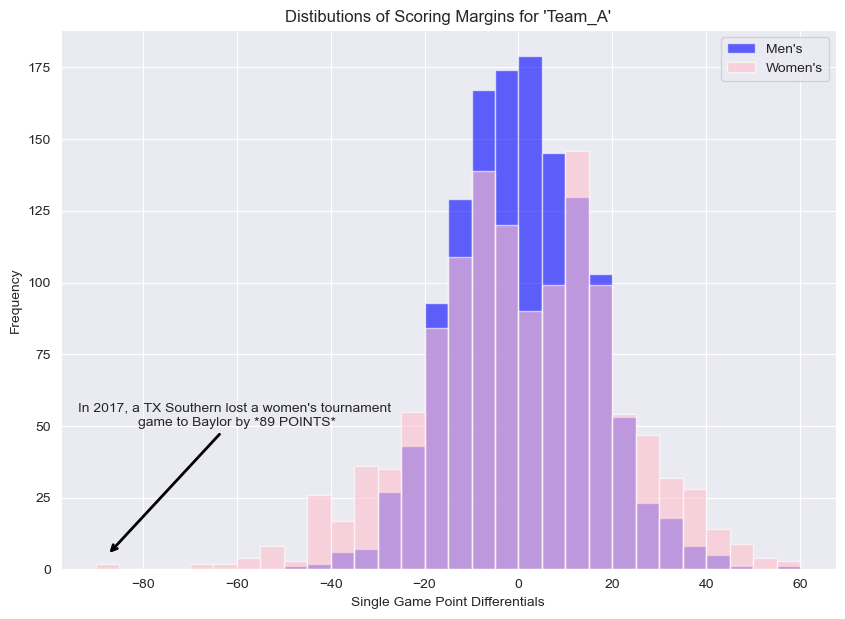

In [92]:
# Inspecting the point diff distribution of all tournament games by league
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style("darkgrid")
filtered_df.query("League=='Men'")["Game_Point_Differential"]\
.plot(kind='hist', ax=ax, alpha=.6, title="Distibutions of Scoring Margins for 'Team_A'", \
      bins=(np.arange(-90, 65, 5)), color="blue", label="Men's")

filtered_df.query("League=='Women'")["Game_Point_Differential"]\
.plot(kind='hist', ax=ax, alpha=.6, bins=np.arange(-90, 65, 5), label="Women's", color="pink")
ax.annotate(text="In 2017, a TX Southern lost a women's tournament \ngame to Baylor by *89 POINTS*", ha="center", \
            xytext=(-60, 50), xy=(-87.5, 5),arrowprops={"arrowstyle":"->", "color":"black", "linewidth":2}, \
            fontsize=10)
ax.set_xlabel("Single Game Point Differentials")
plt.legend();

<hr style="border: 3px solid blue">

<div class="alert alert-block alert-info" style="font-size: 2em;">
<b>Data Prep Conclusion:</b>
</div>
Consolidating all of this data was an arduous task. The "test" data will also only be available after Wednesday, March 20th 2024's play-in games have concluded. I will have to prepare that test data separately as well. Ultimately, by using the detailed regular season game data and aggregating it for each team, I think that we will have an ample selection of features to feed our models in the future, and to hopefully out-pace the accuracy of simply picking the "Chalk". Please take a look at my next notebook to see the process of modeling.